# Análise de Dados: Violência contra a mulher no período pré-pandêmico e pandêmico no estado do Rio Grande do Sul, Brasil

### Bibliotecas utilizadas:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats
%matplotlib inline

### Base de dados: Dados Indicadores da Violência Contra Mulher - Lei Maria da Penha
#### Estado: Rio Grande do Sul
#### Anos: 2019 e 2020
#### Link: https://ssp.rs.gov.br/indicadores-da-violencia-contra-a-mulher

## Carga e Normalização do Indicadores Gerais de 2019

In [2]:
#Path do dataset:
dataset_2019 = 'dataset/dataset-2019.xlsx'
dataset_2020 = 'dataset/dataset-2020.xlsx'

In [3]:
#Carregando o Data Frame de indicadores do ano de 2019
#Tabela de Dados - Carregando os dados Indicadores da tabela "GERAL"
carga_2019 = pd.read_excel(dataset_2019, sheet_name="GERAL", skiprows=range(9), skipfooter=5)

### Visualização Original dos Dados gerais de 2019

In [4]:
carga_2019

,Unnamed: 0,MÊS,AMEAÇA,LESÃO CORPORAL,ESTUPRO (*),FEMINICÍDIO CONSUMADO,FEMINICÍDIO TENTADO
0,NaN,2019-01-01 00:00:00,3765,2116,184,3,44
1,NaN,2019-02-01 00:00:00,3214,1820,132,1,23
2,NaN,2019-03-01 00:00:00,3457,1949,126,11,25
3,NaN,2019-04-01 00:00:00,3085,1719,107,6,37
4,NaN,2019-05-01 00:00:00,2893,1499,104,11,31
5,NaN,2019-06-01 00:00:00,2799,1589,133,9,23
6,NaN,2019-07-01 00:00:00,2739,1364,143,14,22
7,NaN,2019-08-01 00:00:00,3004,1460,156,8,27
8,NaN,2019-09-01 00:00:00,3031,1663,174,7,14
9,NaN,2019-10-01 00:00:00,3085,1723,166,9,41


### Realizando a limpeza de dados da tabela: Dados Gerais de 2019

In [4]:
# Removendo colunas que possuem valores vazios
geral_2019 = carga_2019.dropna(axis=1, how='all')
#Removendo linhas que possuem valores vazios
geral_2019 = geral_2019.dropna(how='all')

### Visualização dos Dados gerais de 2019 normalizados

In [6]:
geral_2019

,MÊS,AMEAÇA,LESÃO CORPORAL,ESTUPRO (*),FEMINICÍDIO CONSUMADO,FEMINICÍDIO TENTADO
0,2019-01-01 00:00:00,3765,2116,184,3,44
1,2019-02-01 00:00:00,3214,1820,132,1,23
2,2019-03-01 00:00:00,3457,1949,126,11,25
3,2019-04-01 00:00:00,3085,1719,107,6,37
4,2019-05-01 00:00:00,2893,1499,104,11,31
5,2019-06-01 00:00:00,2799,1589,133,9,23
6,2019-07-01 00:00:00,2739,1364,143,14,22
7,2019-08-01 00:00:00,3004,1460,156,8,27
8,2019-09-01 00:00:00,3031,1663,174,7,14
9,2019-10-01 00:00:00,3085,1723,166,9,41


## Carga e Normalização do Indicadores de Ameaças de 2019¶

### Carga e Normalização de Ameaças de 2019

In [5]:
#Carregando o Data Frame de indicadores do ano de 2019
#Tabela de Dados - Carregando os dados Indicadores da tabela "AMEAÇAS"
carga_2019 = pd.read_excel(dataset_2019, sheet_name="AMEAÇA", skiprows=range(6), skipfooter=4, index_col=None, header=None)

### Visualização Original dos Dados Ameaças de 2019

In [169]:
carga_2019

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,CIDADES,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,Total,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CRIME,AMEAÇA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Soma de VÍTIMAS,Rótulos de Coluna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,VITORIA DAS MISSOES,0,1,0,1,0,0,0,0,2,1,0,0,5,NaN,NaN,NaN,NaN,NaN
501,WESTFALIA,0,1,0,0,1,0,0,0,0,1,0,0,3,NaN,NaN,NaN,NaN,NaN
502,XANGRI-LA,5,3,7,6,4,1,6,4,5,11,7,9,68,NaN,NaN,NaN,NaN,NaN
503,NÃO INFORMADO,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN


### Realizando a limpeza de dados da tabela: Ameaças de 2019


In [6]:
#Removendo colunas que possuem valores vazios
ameaca_2019 = carga_2019.dropna(axis=1, how='all')
#Removendo linhas que possuem valores vazios
ameaca_2019.dropna(how='all')
#Removendo colunas que não apresentam importancia pra análise
ameaca_2019 = ameaca_2019.drop([0,1,2,3,4,5])
# Renomeando índices
ameaca_2019 = ameaca_2019.rename(columns = {0:"Cidades", 1: "jan/19", 2: "fev/19", 3: "mar/19", 4: "abr/19", 5: "mai/19", 6: "jun/19", 7: "jul/19", 8: "ago/19", 9: "set/19", 10: "out/19", 11: "nov/19", 12: "dez/19", 13: "Total"})
# Renomeando nan por 0
ameaca_2019= ameaca_2019.replace(np.nan,0)
# Reiniciando os valores dos índices
ameaca_2019 = ameaca_2019.reset_index(drop = True)

### Visualização dos Dados Ameaças de 2019 normalizados

In [246]:
ameaca_2019

,Cidades,jan/19,fev/19,mar/19,abr/19,mai/19,jun/19,jul/19,ago/19,set/19,out/19,nov/19,dez/19,Total
0,ACEGUA,0,0,0,1,1,0,0,0,0,1,1,0,4
1,AGUA SANTA,0,1,0,0,0,1,0,0,0,1,0,0,3
2,AGUDO,4,5,3,8,3,7,6,5,10,3,0,4,58
3,AJURICABA,1,2,2,3,4,3,0,1,0,1,1,1,19
4,ALECRIM,4,0,6,3,2,3,0,2,2,0,3,4,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,VITORIA DAS MISSOES,0,1,0,1,0,0,0,0,2,1,0,0,5
495,WESTFALIA,0,1,0,0,1,0,0,0,0,1,0,0,3
496,XANGRI-LA,5,3,7,6,4,1,6,4,5,11,7,9,68
497,NÃO INFORMADO,0,0,0,0,0,0,0,0,0,0,0,0,0


## Carga e Normalização do Indicadores de Lesão corporal em 2019

### Carga e Normalização de Lesão Corporal de 2019

In [7]:
#Carregando o Data Frame de indicadores do ano de 2019
#Tabela de Dados - Carregando os dados Indicadores da tabela "LESÃO CORPORAL"
carga_2019 = pd.read_excel(dataset_2019, sheet_name="LESÃO CORPORAL", skiprows=range(6), skipfooter=4, index_col=None, header=None)

### Visualização Original dos Dados Lesão Corporal de 2019

In [29]:
carga_2019

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,CIDADES,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,Total,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CRIME,LESÃO CORPORAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Soma de VÍTIMAS,Rótulos de Coluna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,VITORIA DAS MISSOES,0,0,0,0,0,0,0,1,0,1,0,0,2,NaN,NaN,NaN,NaN,NaN
501,WESTFALIA,0,0,0,0,0,0,0,0,1,0,0,0,1,NaN,NaN,NaN,NaN,NaN
502,XANGRI-LA,11,6,7,5,0,1,1,1,4,3,2,7,48,NaN,NaN,NaN,NaN,NaN
503,NÃO INFORMADO,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN


### Realizando a limpeza de dados da tabela:  Lesão Corporal de 2019

In [8]:
# Removendo colunas que possuem valores vazios
lesao_2019 = carga_2019.dropna(axis=1, how='all')
#Removendo linhas que possuem valores vazios
lesao_2019.dropna(how='all')
# Removendo colunas que não apresentam importancia pra análise
lesao_2019 = lesao_2019.drop([0,1,2,3,4,5])
# Renomeando índices
lesao_2019 = lesao_2019.rename(columns = {0:"Cidades", 1: "jan/19", 2: "fev/19", 3: "mar/19", 4: "abr/19", 5: "mai/19", 6: "jun/19", 7: "jul/19", 8: "ago/19", 9: "set/19", 10: "out/19", 11: "nov/19", 12: "dez/19", 13: "Total"})
# Renomeando nan por 0
lesao_2019= lesao_2019.replace(np.nan,0)
# Reiniciando os valores dos índices
lesao_2019 = lesao_2019.reset_index(drop = True)

### Visualização dos Dados Lesões de 2019 normalizados

In [269]:
lesao_2019

,Cidades,jan/19,fev/19,mar/19,abr/19,mai/19,jun/19,jul/19,ago/19,set/19,out/19,nov/19,dez/19,Total
0,ACEGUA,0,0,0,1,0,2,1,1,0,1,0,0,6
1,AGUA SANTA,0,0,1,0,0,1,0,0,0,0,1,1,4
2,AGUDO,5,7,0,6,4,1,0,0,3,1,2,3,32
3,AJURICABA,1,0,2,1,0,1,2,1,1,2,4,0,15
4,ALECRIM,1,0,1,0,0,1,2,0,3,0,1,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,VITORIA DAS MISSOES,0,0,0,0,0,0,0,1,0,1,0,0,2
495,WESTFALIA,0,0,0,0,0,0,0,0,1,0,0,0,1
496,XANGRI-LA,11,6,7,5,0,1,1,1,4,3,2,7,48
497,NÃO INFORMADO,0,0,0,0,0,0,0,0,0,0,0,0,0


## Carga e Normalização do Indicadores de Estupro em 2019

### Carga e Normalização de Estupro em 2019

In [9]:
#Carregando o Data Frame de indicadores do ano de 2019
#Tabela de Dados - Carregando os dados Indicadores da tabela "ESTUPRO"
carga_2019 = pd.read_excel(dataset_2019, sheet_name="ESTUPRO", skiprows=range(6), skipfooter=4, index_col=None, header=None)

### Visualização Original dos Dados Estupro de 2019

In [33]:
carga_2019

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,CIDADES,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,Total,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CRIME,ESTUPRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Soma de VÍTIMAS,Rótulos de Coluna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,VITORIA DAS MISSOES,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
501,WESTFALIA,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
502,XANGRI-LA,1,0,0,0,0,0,0,1,0,3,0,0,5,NaN,NaN,NaN,NaN,NaN
503,NÃO INFORMADO,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN


### Realizando a limpeza de dados da tabela: Estupro em 2019

In [10]:
# Removendo colunas que possuem valores vazios
estupro_2019 = carga_2019.dropna(axis=1, how='all')
#Removendo linhas que possuem valores vazios
estupro_2019.dropna(how='all')
# Removendo colunas que não apresentam importancia pra análise
estupro_2019 = estupro_2019.drop([0,1,2,3,4,5])
# Renomeando índices
estupro_2019 = estupro_2019.rename(columns = {0:"Cidades", 1: "jan/19", 2: "fev/19", 3: "mar/19", 4: "abr/19", 5: "mai/19", 6: "jun/19", 7: "jul/19", 8: "ago/19", 9: "set/19", 10: "out/19", 11: "nov/19", 12: "dez/19", 13: "Total"})
# Renomeando nan por 0
estupro_2019= estupro_2019.replace(np.nan,0)
#Reiniciando valores dos índices
estupro_2019 = estupro_2019.reset_index(drop=True) 


### Visualização dos Dados Estupro de 2019 normalizados

In [285]:
estupro_2019

,Cidades,jan/19,fev/19,mar/19,abr/19,mai/19,jun/19,jul/19,ago/19,set/19,out/19,nov/19,dez/19,Total
0,ACEGUA,0,0,0,0,0,0,0,0,0,0,0,0,0
1,AGUA SANTA,0,0,0,0,0,0,0,0,0,0,0,0,0
2,AGUDO,0,0,0,1,0,0,0,0,2,1,1,1,6
3,AJURICABA,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ALECRIM,0,0,1,0,1,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,VITORIA DAS MISSOES,0,0,0,0,0,0,0,0,0,0,0,0,0
495,WESTFALIA,0,0,0,0,0,0,0,0,0,0,0,0,0
496,XANGRI-LA,1,0,0,0,0,0,0,1,0,3,0,0,5
497,NÃO INFORMADO,0,0,0,0,0,0,0,0,0,0,0,0,0


## Carga e Normalização do Indicadores de Feminicídio consumado em 2019

### Carga e Normalização de Feminicídio consumado

In [11]:
#Carregando o Data Frame de indicadores do ano de 2019
#Tabela de Dados - Carregando os dados Indicadores da tabela "FEMINICÍDIO CONSUMADO"
carga_2019 = pd.read_excel(dataset_2019, sheet_name="FEMINICÍDIO CONSUMADO", skiprows=range(6), skipfooter=0, index_col=None, header=None)


### Visualização Original dos Feminicídios consumados de 2019

In [37]:
carga_2019

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,CIDADES,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,Total
1,ALEGRETE,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,ALVORADA,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,NaN,2
3,BENTO GONCALVES,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,1,NaN,3
4,BOM JESUS,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,JULIO DE CASTILHOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1
67,SAO FRANCISCO DE ASSIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1
68,SARANDI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1
69,VITORIA DAS MISSOES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1


### Realizando a limpeza de dados da tabela: Feminicídio Consumado em 2019

In [12]:
# Removendo colunas que possuem valores vazios
consumado_2019 = carga_2019.dropna(axis=1, how='all')
#Removendo linhas que possuem valores vazios
consumado_2019.dropna(how='all')
# Removendo colunas que não apresentam importancia pra análise
consumado_2019 = consumado_2019.drop([0])
# Renomeando índices
consumado_2019 = consumado_2019.rename(columns = {0:"Cidades", 1: "jan/19", 2: "fev/19", 3: "mar/19", 4: "abr/19", 5: "mai/19", 6: "jun/19", 7: "jul/19", 8: "ago/19", 9: "set/19", 10: "out/19", 11: "nov/19", 12: "dez/19", 13: "Total"})
# Renomeando nan por 0
consumado_2019 = consumado_2019.replace(np.nan,0)


### Visualização dos Dados Feminicídio Consumado de 2019 normalizados

In [297]:
consumado_2019

,Cidades,jan/19,fev/19,mar/19,abr/19,mai/19,jun/19,jul/19,ago/19,set/19,out/19,nov/19,dez/19,Total
1,ALEGRETE,0,0,0,1,0,0,0,0,0,0,0,0,1
2,ALVORADA,0,0,0,0,0,0,1,0,0,0,1,0,2
3,BENTO GONCALVES,0,0,0,0,0,0,1,1,0,0,1,0,3
4,BOM JESUS,0,0,0,0,0,0,1,0,0,0,0,1,2
5,BOM RETIRO DO SUL,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,JULIO DE CASTILHOS,0,0,0,0,0,0,0,0,0,1,0,0,1
67,SAO FRANCISCO DE ASSIS,0,0,0,0,0,0,0,0,0,1,0,0,1
68,SARANDI,0,0,0,0,0,0,0,0,0,1,0,0,1
69,VITORIA DAS MISSOES,0,0,0,0,0,0,0,0,0,1,0,0,1


## Carga e Normalização do Indicadores de Feminicídio tentado em 2019

### Carga e Normalização de Feminicídio tentado em 2019

In [13]:
#Carregando o Data Frame de indicadores do ano de 2019
#Tabela de Dados - Carregando os dados Indicadores da tabela "FEMINICÍDIO TENTADO"
carga_2019 = pd.read_excel(dataset_2019, sheet_name="FEMINICÍDIO TENTADO", skiprows=range(6),nrows=119, index_col=None, header=None)

### Visualização Original dos Dados de Feminicídio tentado de 2019

In [304]:
carga_2019

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,CIDADES,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,Total,NaN,NaN,NaN,NaN,NaN
1,ALEGRETE,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
2,ALPESTRE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
3,ALVORADA,1,NaN,NaN,1,NaN,2,NaN,1,1,1,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN
4,ANTA GORDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,VENANCIO AIRES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
115,VERANOPOLIS,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
116,VIAMAO,2,NaN,NaN,3,2,NaN,2,NaN,1,5,1,NaN,16,NaN,NaN,NaN,NaN,NaN
117,VILA MARIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN


### Realizando a limpeza de dados da tabela: Feminicídio Tentado em 2019

In [14]:
# Removendo colunas que possuem valores vazios
tentado_2019 = carga_2019.dropna(axis=1, how='all')
#Removendo linhas que possuem valores vazios
tentado_2019= tentado_2019.dropna(how='all')
# Removendo colunas que não apresentam importancia pra análise
tentado_2019 = tentado_2019.drop([0])
# Renomeando nan por 0
tentado_2019= tentado_2019.replace(np.nan,0)
# Renomeando índices
tentado_2019= tentado_2019.rename(columns = {0:"Cidades", 1: "jan/19", 2: "fev/19", 3: "mar/19", 4: "abr/19", 5: "mai/19", 6: "jun/19", 7: "jul/19", 8: "ago/19", 9: "set/19", 10: "out/19", 11: "nov/19", 12: "dez/19", 13: "Total"})

### Visualização dos Dados Feminicídio Tentado de 2019 normalizados

In [306]:
tentado_2019

,Cidades,jan/19,fev/19,mar/19,abr/19,mai/19,jun/19,jul/19,ago/19,set/19,out/19,nov/19,dez/19,Total
1,ALEGRETE,0,0,1,0,1,0,0,0,0,0,0,0,2
2,ALPESTRE,0,0,0,0,0,0,0,0,1,0,0,0,1
3,ALVORADA,1,0,0,1,0,2,0,1,1,1,0,0,7
4,ANTA GORDA,0,0,0,0,0,0,0,0,0,1,0,0,1
5,ARARICA,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,VENANCIO AIRES,0,0,0,0,0,0,0,1,0,0,0,0,1
115,VERANOPOLIS,0,0,0,0,0,1,0,0,0,0,0,0,1
116,VIAMAO,2,0,0,3,2,0,2,0,1,5,1,0,16
117,VILA MARIA,0,0,0,0,0,0,0,0,0,0,1,0,1


In [44]:
tentado_2019.tail()

,Cidades,jan/19,fev/19,mar/19,abr/19,mai/19,jun/19,jul/19,ago/19,set/19,out/19,nov/19,dez/19,Total
114,VENANCIO AIRES,0,0,0,0,0,0,0,1,0,0,0,0,1
115,VERANOPOLIS,0,0,0,0,0,1,0,0,0,0,0,0,1
116,VIAMAO,2,0,0,3,2,0,2,0,1,5,1,0,16
117,VILA MARIA,0,0,0,0,0,0,0,0,0,0,1,0,1
118,TOTAL GERAL,44,23,25,37,31,23,22,27,14,41,39,33,359


## Carga e Normalização do Indicadores Gerais de 2020

In [15]:
#Carregando o Data Frame de indicadores do ano de 2020
#Tabela de Dados - Carregando os dados Indicadores da tabela "GERAL"
carga_2020 = pd.read_excel(dataset_2020, sheet_name="GERAL", skiprows=range(9), nrows=18)

### Vizualização Original dos Dados Indicadores Gerais

In [12]:
carga_2020

,Unnamed: 0,MÊS,AMEAÇA,LESÃO CORPORAL,ESTUPRO (*),Unnamed: 5,Unnamed: 6,FEMINICÍDIO CONSUMADO,Unnamed: 8,Unnamed: 9,FEMINICÍDIO TENTADO
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,VALIDAÇÃO DEAM,- todas -,NaN,VALIDAÇÃO DEAM,- múltiplo -
3,NaN,Soma de VÍTIMAS,CRIME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,MÊS,AMEAÇA,LESÃO CORPORAL,ESTUPRO,NaN,Meses,(vazio),NaN,Data Fato,(vazio)
5,NaN,2020-01-01 00:00:00,3702,2144,179,NaN,jan,NaN,NaN,jan,NaN
6,NaN,2020-02-01 00:00:00,3439,1990,173,NaN,fev,NaN,NaN,fev,NaN
7,NaN,2020-03-01 00:00:00,2869,1811,149,NaN,mar,NaN,NaN,mar,NaN
8,NaN,2020-04-01 00:00:00,2228,1312,104,NaN,abr,NaN,NaN,abr,NaN
9,NaN,2020-05-01 00:00:00,2402,1225,126,NaN,mai,NaN,NaN,mai,NaN


### Realizando a limpeza de dados da tabela - Gerais

In [16]:
#Removendo colunas que possui somente valores vazios;
geral = carga_2020.dropna(axis=1, how='all')
#Removendo linhas que possui somente valores váxios/
geral_2020 = geral.dropna(how='all')
#Removendo colunas que não apresenta importância para análise
geral_2020 = geral.drop(columns=['Unnamed: 6','Unnamed: 9'])
# Removendo linhas que não apresenta importância para análise
geral_2020 = geral_2020.drop([0,1,2,3,4])
#Subistituindo valores "NaN" por ZERO;
geral_2020 = geral_2020.replace(np.nan,0)
#Reinciando os valores dos indíces
geral_2020 = geral_2020.reset_index(drop=True)

### Vizualização dos Dados Indicadores Gerais Normalizado

In [17]:
geral_2020

,MÊS,AMEAÇA,LESÃO CORPORAL,ESTUPRO (*),FEMINICÍDIO CONSUMADO,FEMINICÍDIO TENTADO
0,2020-01-01 00:00:00,3702,2144,179,0,0
1,2020-02-01 00:00:00,3439,1990,173,0,0
2,2020-03-01 00:00:00,2869,1811,149,0,0
3,2020-04-01 00:00:00,2228,1312,104,0,0
4,2020-05-01 00:00:00,2402,1225,126,0,0
5,2020-06-01 00:00:00,2406,1247,138,0,0
6,2020-07-01 00:00:00,2390,1166,131,0,0
7,2020-08-01 00:00:00,2661,1366,146,0,0
8,2020-09-01 00:00:00,2389,1409,149,0,0
9,2020-10-01 00:00:00,2690,1629,171,0,0


In [145]:
#Primeiras 5 linhas
geral_2020.head()

,MÊS,AMEAÇA,LESÃO CORPORAL,ESTUPRO (*),FEMINICÍDIO CONSUMADO,FEMINICÍDIO TENTADO
0,2020-01-01 00:00:00,3702,2144,179,0,0
1,2020-02-01 00:00:00,3439,1990,173,0,0
2,2020-03-01 00:00:00,2869,1811,149,0,0
3,2020-04-01 00:00:00,2228,1312,104,0,0
4,2020-05-01 00:00:00,2402,1225,126,0,0


In [146]:
#Últimas 5 linhas
geral_2020.tail()

,MÊS,AMEAÇA,LESÃO CORPORAL,ESTUPRO (*),FEMINICÍDIO CONSUMADO,FEMINICÍDIO TENTADO
8,2020-09-01 00:00:00,2389,1409,149,0,0
9,2020-10-01 00:00:00,2690,1629,171,0,0
10,2020-11-01 00:00:00,0,0,0,0,0
11,2020-12-01 00:00:00,0,0,0,0,0
12,Total,27176,15299,1466,0,0


In [51]:
#Últimas 5 linhas
geral_2020.tail()

,MÊS,AMEAÇA,LESÃO CORPORAL,ESTUPRO (*),FEMINICÍDIO CONSUMADO,FEMINICÍDIO TENTADO
8,2020-09-01 00:00:00,2389,1409,149,0,0
9,2020-10-01 00:00:00,2690,1629,171,0,0
10,2020-11-01 00:00:00,0,0,0,0,0
11,2020-12-01 00:00:00,0,0,0,0,0
12,Total,27176,15299,1466,0,0


## Carga e Normalização do Indicadores de Ameaças de 2020

In [17]:
#Carregando o Data Frame de indicadores de Ameaças do ano de 2020
#Tabela de Dados - Carregando os dados Indicadores da tabela "AMEAÇAS"
ameaca_2020 = pd.read_excel(dataset_2020, sheet_name="AMEAÇA", skiprows=range(9), nrows=501)

### Vizualização Original dos Dados Indicadores de Ameaças

In [38]:
ameaca_2020

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Soma de VÍTIMAS,Rótulos de Coluna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rótulos de Linha,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACEGUA,3,0,0,0,0,0,0,0,0,0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
3,AGUA SANTA,0,0,0,1,0,0,0,0,0,0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,AGUDO,4,6,4,4,1,6,1,3,1,4,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,VITORIA DAS MISSOES,1,1,3,0,0,0,0,0,0,1,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
497,WESTFALIA,0,0,0,1,0,0,0,1,0,0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
498,XANGRI-LA,12,6,5,6,7,1,2,5,4,3,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN
499,NÃO INFORMADO,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


### Realizando a limpeza de dados da tabela - Ameaças

In [18]:
#Removendo colunas que possui somente valores vazios;
ameaca = ameaca_2020.dropna(axis=1, how='all')
#Removendo linhas que possui somente valores vazios;
ameaca_2020 = ameaca.dropna(how='all')
# Removendo linhas que não apresenta importância para análise
ameaca_2020 = ameaca_2020.drop([0,1])
#Renomeando nomes das colunas
ameaca_2020 = ameaca_2020.rename(columns = {'Unnamed: 0': 'Cidade', 'Unnamed: 1': 'jan/20','Unnamed: 2': 'fev/20','Unnamed: 3': 'mar/20','Unnamed: 4': 'abr/20','Unnamed: 5': 'mai/20','Unnamed: 6': 'jun/20','Unnamed: 7': 'jul/20','Unnamed: 8': 'ago/20','Unnamed: 9': 'set/20','Unnamed: 10': 'out/20','Unnamed: 13': 'Total',})
#Reinciando os valores dos indíces
ameaca_2020 = ameaca_2020.reset_index(drop=True)

### Vizualização dos Dados Indicadores de Ameaças Normalizado

In [316]:
ameaca_2020

,Cidade,jan/20,fev/20,mar/20,abr/20,mai/20,jun/20,jul/20,ago/20,set/20,out/20,Total
0,ACEGUA,3,0,0,0,0,0,0,0,0,0,3.0
1,AGUA SANTA,0,0,0,1,0,0,0,0,0,0,1.0
2,AGUDO,4,6,4,4,1,6,1,3,1,4,30.0
3,AJURICABA,3,0,4,1,1,3,2,1,4,0,19.0
4,ALECRIM,2,2,1,1,0,2,1,1,2,0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
494,VITORIA DAS MISSOES,1,1,3,0,0,0,0,0,0,1,5.0
495,WESTFALIA,0,0,0,1,0,0,0,1,0,0,2.0
496,XANGRI-LA,12,6,5,6,7,1,2,5,4,3,48.0
497,NÃO INFORMADO,0,0,0,0,0,0,0,0,0,0,0.0


In [56]:
#Primeiras 5 linhas
ameaca_2020.head()

,Cidade,jan/20,fev/20,mar/20,abr/20,mai/20,jun/20,jul/20,ago/20,set/20,out/20,Total
0,ACEGUA,3,0,0,0,0,0,0,0,0,0,3.0
1,AGUA SANTA,0,0,0,1,0,0,0,0,0,0,1.0
2,AGUDO,4,6,4,4,1,6,1,3,1,4,30.0
3,AJURICABA,3,0,4,1,1,3,2,1,4,0,19.0
4,ALECRIM,2,2,1,1,0,2,1,1,2,0,12.0


In [41]:
#Últimas 5 linhas
ameaca_2020.tail()

,Cidade,jan/20,fev/20,mar/20,abr/20,mai/20,jun/20,jul/20,ago/20,set/20,out/20,Total
494,VITORIA DAS MISSOES,1,1,3,0,0,0,0,0,0,1,5.0
495,WESTFALIA,0,0,0,1,0,0,0,1,0,0,2.0
496,XANGRI-LA,12,6,5,6,7,1,2,5,4,3,48.0
497,NÃO INFORMADO,0,0,0,0,0,0,0,0,0,0,0.0
498,Total Geral,3702,3439,2869,2228,2402,2406,2390,2661,2389,2690,27176.0


## Carga e Normalização do Indicadores de Lesão Corporal de 2020

In [19]:
#Carregando o Data Frame de indicadores de Lesão Corporal do ano de 2020
#Tabela de Dados - Carregando os dados Indicadores da tabela "LESÃO CORPORAL"
lesao_2020 = pd.read_excel(dataset_2020, sheet_name="LESÃO CORPORAL", skiprows=range(9), nrows=501)

### Vizualização Original dos Dados Indicadores de Lesão Corporal

In [53]:
lesao_2020

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Soma de VÍTIMAS,Rótulos de Coluna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rótulos de Linha,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACEGUA,1,0,0,0,0,0,0,0,0,2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,AGUA SANTA,0,0,1,1,0,1,0,0,0,0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
4,AGUDO,0,10,2,1,4,2,4,3,3,4,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,VITORIA DAS MISSOES,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
497,WESTFALIA,0,0,1,0,1,1,0,0,0,0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
498,XANGRI-LA,4,2,5,4,0,2,3,3,2,2,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN
499,NÃO INFORMADO,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


### Realizando a limpeza de dados da tabela - Lesão Corporal

In [20]:
#Removendo colunas que possui somente valores vazios;
lesao = lesao_2020.dropna(axis=1, how='all')
#Removendo linhas que possui somente valores vazios
lesao_2020 = lesao.dropna(how='all')
# Removendo linhas que não apresenta importância para análise
lesao_2020 = lesao_2020.drop([0,1])
#Renomeando nomes das colunas
lesao_2020 = lesao_2020.rename(columns = {'Unnamed: 0': 'Cidade', 'Unnamed: 1': 'jan/20','Unnamed: 2': 'fev/20','Unnamed: 3': 'mar/20','Unnamed: 4': 'abr/20','Unnamed: 5': 'mai/20','Unnamed: 6': 'jun/20','Unnamed: 7': 'jul/20','Unnamed: 8': 'ago/20','Unnamed: 9': 'set/20','Unnamed: 10': 'out/20','Unnamed: 13': 'Total',})
#Reinciando os valores dos indíces
lesao_2020 = lesao_2020.reset_index(drop=True)

### Vizualização dos Dados Indicadores de Lesão Corporal Normalizado

In [328]:
lesao_2020

,Cidade,jan/20,fev/20,mar/20,abr/20,mai/20,jun/20,jul/20,ago/20,set/20,out/20,Total
0,ACEGUA,1,0,0,0,0,0,0,0,0,2,1.0
1,AGUA SANTA,0,0,1,1,0,1,0,0,0,0,3.0
2,AGUDO,0,10,2,1,4,2,4,3,3,4,29.0
3,AJURICABA,0,1,2,3,0,0,0,2,0,1,8.0
4,ALECRIM,2,0,0,1,1,3,0,0,1,1,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
494,VITORIA DAS MISSOES,0,0,0,0,0,0,0,0,0,0,0.0
495,WESTFALIA,0,0,1,0,1,1,0,0,0,0,3.0
496,XANGRI-LA,4,2,5,4,0,2,3,3,2,2,25.0
497,NÃO INFORMADO,0,0,0,0,0,0,0,0,0,0,0.0


In [56]:
#Primeiras 5 linhas
lesao_2020.head()

,Cidade,jan/20,fev/20,mar/20,abr/20,mai/20,jun/20,jul/20,ago/20,set/20,out/20,Total
0,ACEGUA,1,0,0,0,0,0,0,0,0,2,1.0
1,AGUA SANTA,0,0,1,1,0,1,0,0,0,0,3.0
2,AGUDO,0,10,2,1,4,2,4,3,3,4,29.0
3,AJURICABA,0,1,2,3,0,0,0,2,0,1,8.0
4,ALECRIM,2,0,0,1,1,3,0,0,1,1,8.0


In [57]:
#Últimas 5 linhas
lesao_2020.tail()

,Cidade,jan/20,fev/20,mar/20,abr/20,mai/20,jun/20,jul/20,ago/20,set/20,out/20,Total
494,VITORIA DAS MISSOES,0,0,0,0,0,0,0,0,0,0,0.0
495,WESTFALIA,0,0,1,0,1,1,0,0,0,0,3.0
496,XANGRI-LA,4,2,5,4,0,2,3,3,2,2,25.0
497,NÃO INFORMADO,0,0,0,0,0,0,0,0,0,0,0.0
498,Total Geral,2144,1990,1811,1312,1225,1247,1166,1366,1409,1629,15299.0


## Carga e Normalização do Indicadores de Estupro de 2020

In [21]:
#Carregando o Data Frame de indicadores de Estupro do ano de 2020
#Tabela de Dados - Carregando os dados Indicadores da tabela "ESTUPRO"
estupro_2020 = pd.read_excel(dataset_2020, sheet_name="ESTUPRO", skiprows=range(9), nrows=501)

### Vizualização Original dos Dados Indicadores de Lesão Corporal

In [336]:
estupro_2020

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Soma de VÍTIMAS,MÊS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CIDADE,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,(vazio),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACEGUA,0,1,0,0,0,0,0,0,0,0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,AGUA SANTA,1,0,0,0,0,0,0,0,0,0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,AGUDO,0,0,2,0,0,0,1,0,0,0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,VITORIA DAS MISSOES,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
497,WESTFALIA,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
498,XANGRI-LA,0,0,0,1,0,1,0,0,1,0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
499,NÃO INFORMADO,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


### Realizando a limpeza de dados da tabela - Estupro

In [22]:
#Removendo colunas que possui somente valores vazios;
estupro = estupro_2020.dropna(axis=1, how='all')
#Removendo linhas que possui somente valores vazios;
estupro_2020 = estupro.dropna(how='all')
# Removendo linhas que não apresenta importância para análise
estupro_2020 = estupro_2020.drop([0,1])
#Renomeando nomes das colunas
estupro_2020 = estupro_2020.rename(columns = {'Unnamed: 0': 'Cidade', 'Unnamed: 1': 'jan/20','Unnamed: 2': 'fev/20','Unnamed: 3': 'mar/20','Unnamed: 4': 'abr/20','Unnamed: 5': 'mai/20','Unnamed: 6': 'jun/20','Unnamed: 7': 'jul/20','Unnamed: 8': 'ago/20','Unnamed: 9': 'set/20','Unnamed: 10': 'out/20','Unnamed: 11': 'nov/20','Unnamed: 13': 'Total',})
#Subistituindo valores "NaN" por ZERO;
estupro_2020 = estupro_2020.replace(np.nan,0)
#Reinciando os valores dos indíces
estupro_2020 = estupro_2020.reset_index(drop=True)

### Vizualização dos Dados Indicadores de Estupro Normalizado

In [338]:
estupro_2020

,Cidade,jan/20,fev/20,mar/20,abr/20,mai/20,jun/20,jul/20,ago/20,set/20,out/20,nov/20,Total
0,ACEGUA,0,1,0,0,0,0,0,0,0,0,0,1.0
1,AGUA SANTA,1,0,0,0,0,0,0,0,0,0,0,1.0
2,AGUDO,0,0,2,0,0,0,1,0,0,0,0,3.0
3,AJURICABA,0,0,0,0,0,0,0,0,0,0,0,0.0
4,ALECRIM,0,0,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,VITORIA DAS MISSOES,0,0,0,0,0,0,0,0,0,0,0,0.0
495,WESTFALIA,0,0,0,0,0,0,0,0,0,0,0,0.0
496,XANGRI-LA,0,0,0,1,0,1,0,0,1,0,0,3.0
497,NÃO INFORMADO,0,0,0,0,0,0,0,0,0,0,0,0.0


In [61]:
#Primeiras 5 linhas
estupro_2020.head()

,Cidade,jan/20,fev/20,mar/20,abr/20,mai/20,jun/20,jul/20,ago/20,set/20,out/20,Total
0,ACEGUA,0,1,0,0,0,0,0,0,0,0,1.0
1,AGUA SANTA,1,0,0,0,0,0,0,0,0,0,1.0
2,AGUDO,0,0,2,0,0,0,1,0,0,0,3.0
3,AJURICABA,0,0,0,0,0,0,0,0,0,0,0.0
4,ALECRIM,0,0,0,0,0,0,0,0,0,0,0.0


In [62]:
#Últimas 5 linhas
estupro_2020.tail()

,Cidade,jan/20,fev/20,mar/20,abr/20,mai/20,jun/20,jul/20,ago/20,set/20,out/20,Total
494,VITORIA DAS MISSOES,0,0,0,0,0,0,0,0,0,0,0.0
495,WESTFALIA,0,0,0,0,0,0,0,0,0,0,0.0
496,XANGRI-LA,0,0,0,1,0,1,0,0,1,0,3.0
497,NÃO INFORMADO,0,0,0,0,0,0,0,0,0,0,0.0
498,Total Geral,179,173,149,104,126,138,131,146,149,171,1466.0


## Carga e Normalização do Indicadores de Feminicídio Consumado de 2020

In [23]:
#Carregando o Data Frame de indicadores de Feminicídio Consumado do ano de 2020
#Tabela de Dados - Carregando os dados Indicadores da tabela "FEMINICÍDIO CONSUMADO"
consumado_2020 = pd.read_excel(dataset_2020, sheet_name="FEMINICÍDIO CONSUMADO", skiprows=range(6), nrows=48)

### Vizualização Original dos Dados Indicadores de Feminicídio Consumado

In [356]:
consumado_2020

,MUNICÍPIO,jan/20,fev/20,mar/20,abr/20,mai/20,jun/20,jul/20,ago/20,set/20,out/20,nov/20,dez/20,Total
0,ALEGRETE,0,0,1,0,0,0,0,0,0,0,NaN,NaN,1
1,ALVORADA,0,0,0,1,0,0,0,0,0,0,NaN,NaN,1
2,AMARAL FERRADOR,0,0,1,0,0,0,0,0,0,0,NaN,NaN,1
3,BOM RETIRO DO SUL,0,0,0,0,0,0,0,0,1,0,NaN,NaN,1
4,CAÇAPAVA DO SUL,0,0,0,0,0,0,0,0,0,1,NaN,NaN,1
5,CACIQUE DOBLE,0,0,1,0,0,0,0,0,0,0,NaN,NaN,1
6,CAMAQUA,0,0,0,1,0,0,0,0,0,0,NaN,NaN,1
7,CAMPO BOM,1,0,1,0,0,0,0,0,0,0,NaN,NaN,2
8,CANELA,1,0,0,0,0,0,0,0,0,0,NaN,NaN,1
9,CANOAS,0,0,0,0,0,0,0,0,1,0,NaN,NaN,1


### Realizando a limpeza de dados da tabela - Feminicídio Consumado

In [24]:
#Removendo colunas que possui somente valores vazios;
consumado = consumado_2020.dropna(axis=1, how='all')
#Removendo linhas que possui somente valores vazios;
consumado_2020 = consumado.dropna(how='all')
#Renomeando nomes das colunas
consumado_2020 = consumado_2020.rename(columns = {'MUNICÍPIO':'Cidade'})
#Subistituindo valores "NaN" por ZERO;
consumado_2020 = consumado_2020.replace(np.nan,0)
#Reinciando os valores dos indíces
consumado_2020 = consumado_2020.reset_index(drop=True)

### Vizualização dos Dados Indicadores de Feminicídio Consumado Normalizado

In [358]:
consumado_2020

,Cidade,jan/20,fev/20,mar/20,abr/20,mai/20,jun/20,jul/20,ago/20,set/20,out/20,nov/20,dez/20,Total
0,ALEGRETE,0,0,1,0,0,0,0,0,0,0,0.0,0.0,1
1,ALVORADA,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1
2,AMARAL FERRADOR,0,0,1,0,0,0,0,0,0,0,0.0,0.0,1
3,BOM RETIRO DO SUL,0,0,0,0,0,0,0,0,1,0,0.0,0.0,1
4,CAÇAPAVA DO SUL,0,0,0,0,0,0,0,0,0,1,0.0,0.0,1
5,CACIQUE DOBLE,0,0,1,0,0,0,0,0,0,0,0.0,0.0,1
6,CAMAQUA,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1
7,CAMPO BOM,1,0,1,0,0,0,0,0,0,0,0.0,0.0,2
8,CANELA,1,0,0,0,0,0,0,0,0,0,0.0,0.0,1
9,CANOAS,0,0,0,0,0,0,0,0,1,0,0.0,0.0,1


In [25]:
#Primeiras 5 linhas
consumado_2020.head()

,Cidade,jan/20,fev/20,mar/20,abr/20,mai/20,jun/20,jul/20,ago/20,set/20,out/20,nov/20,dez/20,Total
0,ALEGRETE,0,0,1,0,0,0,0,0,0,0,0.0,0.0,1
1,ALVORADA,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1
2,AMARAL FERRADOR,0,0,1,0,0,0,0,0,0,0,0.0,0.0,1
3,BOM RETIRO DO SUL,0,0,0,0,0,0,0,0,1,0,0.0,0.0,1
4,CAÇAPAVA DO SUL,0,0,0,0,0,0,0,0,0,1,0.0,0.0,1


In [84]:
#Últimas 5 linhas
consumado_2020.tail()

,Cidade,jan/20,fev/20,mar/20,abr/20,mai/20,jun/20,jul/20,ago/20,set/20,out/20,nov/20,dez/20,Total
43,TENENTE PORTELA,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1
44,TORRES,1,0,1,0,0,0,0,0,0,0,0.0,0.0,2
45,VACARIA,0,0,0,0,0,1,0,0,0,0,0.0,0.0,1
46,VENANCIO AIRES,1,0,0,0,0,0,0,0,0,0,0.0,0.0,1
47,Total Geral,10,5,12,10,6,8,2,4,6,4,0.0,0.0,67


## Carga e Normalização do Indicadores de Feminicídio Tentado de 2020

In [26]:
#Carregando o Data Frame de indicadores de Feminicídio Tentado do ano de 2020
#Tabela de Dados - Carregando os dados Indicadores da tabela "FEMINICÍDIO TENTADO"
tentado_2020 = pd.read_excel(dataset_2020, sheet_name="FEMINICÍDIO TENTADO", skiprows=range(6), nrows=103)

### Vizualização Original dos Dados Indicadores de Feminicídio Tentado

In [361]:
tentado_2020

,MUNICÍPIO,jan/20,fev/20,mar/20,abr/20,mai/20,jun/20,jul/20,ago/20,set/20,out/20,nov/20,dez/20,Total
0,AGUDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,NaN,1
1,ALEGRETE,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,NaN,1
2,ALVORADA,0.0,0.0,0.0,1.0,2.0,1.0,0.0,2.0,1,0,NaN,NaN,7
3,ARROIO DOS RATOS,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,NaN,1
4,BAGE,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,URUGUAIANA,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0,2,NaN,NaN,6
99,VENANCIO AIRES,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,NaN,NaN,2
100,VIAMAO,2.0,1.0,1.0,3.0,2.0,0.0,1.0,1.0,0,1,NaN,NaN,12
101,VILA NOVA DO SUL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,NaN,NaN,1


### Realizando a limpeza de dados da tabela - Feminicídio Tentado

In [27]:
#Removendo colunas que possui somente valores vazios;
tentado = tentado_2020.dropna(axis=1, how='all')
#Removendo linhas que possui somente valores vazios;
tentado_2020 = tentado.dropna(how='all')
#Renomeando nomes das colunas
tentado_2020 = tentado_2020.rename(columns = {'MUNICÍPIO':'Cidade'})
#Subistituindo valores "NaN" por ZERO;
tentado_2020 = tentado_2020.replace(np.nan,0)
#Reinciando os valores dos indíces
tentado_2020 = tentado_2020.reset_index(drop=True)

### Vizualização dos Dados Indicadores de Feminicídio Tentado Normalizado

In [363]:
tentado_2020

,Cidade,jan/20,fev/20,mar/20,abr/20,mai/20,jun/20,jul/20,ago/20,set/20,out/20,nov/20,dez/20,Total
0,AGUDO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,0.0,1
1,ALEGRETE,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,1
2,ALVORADA,0.0,0.0,0.0,1.0,2.0,1.0,0.0,2.0,1,0,0.0,0.0,7
3,ARROIO DOS RATOS,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,1
4,BAGE,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,URUGUAIANA,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0,2,0.0,0.0,6
99,VENANCIO AIRES,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,0.0,2
100,VIAMAO,2.0,1.0,1.0,3.0,2.0,0.0,1.0,1.0,0,1,0.0,0.0,12
101,VILA NOVA DO SUL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,1


In [28]:
#Primeiras 5 linhas
tentado_2020.head()

,Cidade,jan/20,fev/20,mar/20,abr/20,mai/20,jun/20,jul/20,ago/20,set/20,out/20,nov/20,dez/20,Total
0,AGUDO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,0.0,1
1,ALEGRETE,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,1
2,ALVORADA,0.0,0.0,0.0,1.0,2.0,1.0,0.0,2.0,1,0,0.0,0.0,7
3,ARROIO DOS RATOS,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,1
4,BAGE,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,1


In [90]:
#Últimas 5 linhas
tentado_2020.tail()

,Cidade,jan/20,fev/20,mar/20,abr/20,mai/20,jun/20,jul/20,ago/20,set/20,out/20,nov/20,dez/20,Total
98,URUGUAIANA,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0,2,0.0,0.0,6
99,VENANCIO AIRES,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,0.0,2
100,VIAMAO,2.0,1.0,1.0,3.0,2.0,0.0,1.0,1.0,0,1,0.0,0.0,12
101,VILA NOVA DO SUL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,1
102,TOTAL GERAL,32.0,28.0,23.0,18.0,37.0,28.0,22.0,26.0,30,44,0.0,0.0,288


## Questões para Condução da Análise

### Questão Norteadora: O índice de violência contra a mulher aumentou devido a quarentena?

#### 1. Quais os índices de violência no ano da pandemia e no ano anterior?

#### 2. Qual mês teve o maior o número de violência contra a mulher no ano de 2019 e 2020?

In [133]:
geral_2019.head()

,MÊS,AMEAÇA,LESÃO CORPORAL,ESTUPRO (*),FEMINICÍDIO CONSUMADO,FEMINICÍDIO TENTADO
0,2019-01-01 00:00:00,3765,2116,184,3,44
1,2019-02-01 00:00:00,3214,1820,132,1,23
2,2019-03-01 00:00:00,3457,1949,126,11,25
3,2019-04-01 00:00:00,3085,1719,107,6,37
4,2019-05-01 00:00:00,2893,1499,104,11,31


In [113]:
#Somando as linhas(soma total de todos os tipos de VioLência por mês)
geral_2019["Total/Mês"] = geral_2019.sum(axis=1)
#Dataframe apenas com relação de mês / Total de violência
data19 = geral_2019[['MÊS','Total/Mês']]
#Apagando a linha de soma total de violência por ano
data19 = data19.drop(12)
# Renomeando Meses antes de gerar o gráfico
data19['MÊS'] = ['jan','fev','mar', 'abr','mai','jun','jul','ago','set','out','nov','dez']
#Vizualização do Frame - 2019
data19

,MÊS,Total/Mês
0,jan,6112
1,fev,5190
2,mar,5568
3,abr,4954
4,mai,4538
5,jun,4553
6,jul,4282
7,ago,4655
8,set,4889
9,out,5024


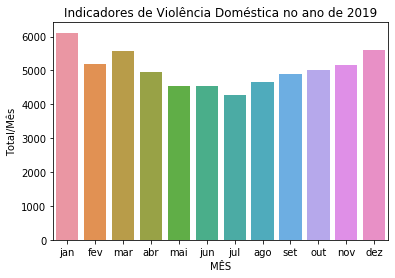

In [114]:
#GRÁFICO DE BARRAS - TOTAL DE VIOLÊNCIA POR MÊS EM 2019 
bar19 = sns.barplot(x=data19['MÊS'],y=data19['Total/Mês'])
title = plt.title("Indicadores de Violência Doméstica no ano de 2019")


In [19]:
#Somando as linhas(soma total de todos os tipos de VioLência por mês)
geral_2020["Total/Mês"] = geral_2020.sum(axis=1)
#Dataframe apenas com relação de mês / Total de violência
data20 = geral_2020[['MÊS','Total/Mês']]
#Apagando a linha de soma total de violência por ano
data20 = data20.drop(12)
# Renomeando Meses antes de gerar o gráfico
data20['MÊS'] = ['jan','fev','mar', 'abr','mai','jun','jul','ago','set','out','nov','dez']
#Vizualização do Frame - 2019
data20

,MÊS,Total/Mês
0,jan,6025
1,fev,5602
2,mar,4829
3,abr,3644
4,mai,3753
5,jun,3791
6,jul,3687
7,ago,4173
8,set,3947
9,out,4490


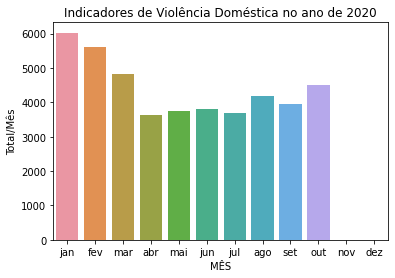

In [179]:
#GRÁFICO DE BARRAS - TOTAL DE VIOLÊNCIA POR MÊS EM 2020 
barra20 = sns.barplot(x=data20['MÊS'],y=data20['Total/Mês'])
title = plt.title("Indicadores de Violência Doméstica no ano de 2020")

### Análise dos Indicadores de Violência do ano de 2019 e 2020

In [117]:
ameaca19 = geral_2019.iloc[12, 1]
lesao19 = geral_2019.iloc[12, 2]
estupro19 = geral_2019.iloc[12, 3]
consumado19 = geral_2019.iloc[12, 4]
tentado19 = geral_2019.iloc[12, 5]

In [118]:
ameaca20 = geral_2020.iloc[12, 1]
lesao20 = geral_2020.iloc[12, 2]
estupro20 = geral_2020.iloc[12, 3]
consumado20 = geral_2020.iloc[12, 4]
tentado20 = geral_2020.iloc[12, 5]

In [119]:
obj = {'2019': [ameaca19, lesao19,estupro19,consumado19,tentado19], '2020': [ameaca20, lesao20,estupro20,consumado20,tentado20]}

In [120]:
frame = pd.DataFrame(obj,index=['Ameaça','Lesão Corporal','Estupro','Feminicídio Consumado','Feminicídio Tentado'])


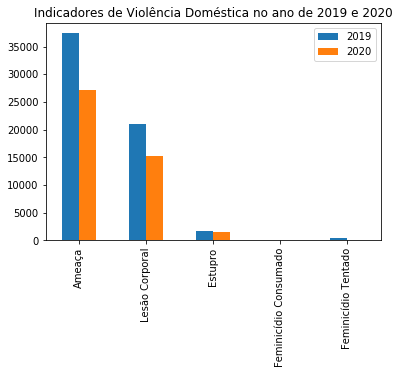

In [121]:
frame.plot.bar()
title = plt.title("Indicadores de Violência Doméstica no ano de 2019 e 2020")

### Análise Feminício Consumado e Feminicídio Tentado nos dois anos

In [122]:
consumado19 = geral_2019.iloc[12, 4]
tentado19 = geral_2019.iloc[12, 5]
consumado20 = geral_2020.iloc[12, 4]
tentado20 = geral_2020.iloc[12, 5]

In [123]:
obj = {'2019': [consumado19,tentado19], '2020': [consumado20,tentado20]}
frame = pd.DataFrame(obj,index=['Feminicídio Consumado','Feminicídio Tentado'])


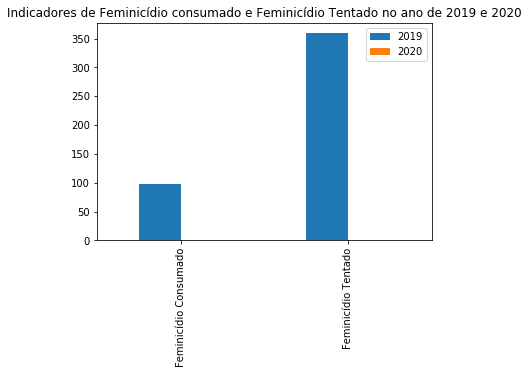

In [124]:
frame.plot.bar()
title = plt.title("Indicadores de Feminicídio consumado e Feminicídio Tentado no ano de 2019 e 2020")

### A partir dos gráficos acima é necessário uma pesquisa mais detalhada na fronteira oeste do RS 

### A base de dados é composta por 5 categorias:  Ameaça, Lesão Corporal, Estupro, Feminicídio Tentado, Feminicídio Consumado

### Índices de ameaças na fronteira oeste em 2020

In [380]:
#Alocando dados de Ameaça de 2020 das Cidades da fronteira oeste 
alegrete = ameaca_2020[ameaca_2020['Cidade']=='ALEGRETE']
itaqui = ameaca_2020[ameaca_2020['Cidade']=='ITAQUI']
barraQuarai = ameaca_2020[ameaca_2020['Cidade']=='BARRA DO QUARAI']
itacurubi = ameaca_2020[ameaca_2020['Cidade']=='ITACURUBI']
macambara = ameaca_2020[ameaca_2020['Cidade']=='MACAMBARA']
manoelViana = ameaca_2020[ameaca_2020['Cidade']=='MANOEL VIANA']
quarai = ameaca_2020[ameaca_2020['Cidade']=='QUARAI']
rosario = ameaca_2020[ameaca_2020['Cidade']=='ROSARIO DO SUL']
margarida = ameaca_2020[ameaca_2020['Cidade']=='SANTA MARGARIDA DO SUL']
livramento = ameaca_2020[ameaca_2020['Cidade']=='SANTANA DO LIVRAMENTO']
borja  = ameaca_2020[ameaca_2020['Cidade']=='SAO BORJA']
gabriel = ameaca_2020[ameaca_2020['Cidade']=='SAO GABRIEL']
uruguaiana = ameaca_2020[ameaca_2020['Cidade']=='URUGUAIANA']

In [381]:
#Alocando dados de Estupro de 2019 das cidades da fronteira oeste 
fronteiraOeste = pd.DataFrame
fronteiraOeste = alegrete
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itaqui))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(barraQuarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itacurubi))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(macambara))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(manoelViana))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(quarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(rosario))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(margarida))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(livramento))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(borja))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(gabriel))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(uruguaiana))
fronteiraOeste

,Cidade,jan/20,fev/20,mar/20,abr/20,mai/20,jun/20,jul/20,ago/20,set/20,out/20,Total
5,ALEGRETE,22,27,20,20,15,21,9,9,21,18,164.0
213,ITAQUI,16,13,7,6,7,7,7,9,9,18,81.0
35,BARRA DO QUARAI,5,0,0,0,0,2,1,4,2,2,14.0
211,ITACURUBI,0,1,1,0,0,0,0,0,0,0,2.0
237,MACAMBARA,1,0,0,0,1,0,1,0,0,1,3.0
240,MANOEL VIANA,0,2,3,3,0,1,2,2,2,1,15.0
335,QUARAI,9,6,9,2,9,6,3,5,5,7,54.0
353,ROSARIO DO SUL,14,10,7,6,8,9,4,4,3,12,65.0
364,SANTA MARGARIDA DO SUL,1,0,3,0,1,0,0,0,1,0,6.0
371,SANTANA DO LIVRAMENTO,40,37,15,12,17,21,23,16,16,7,197.0


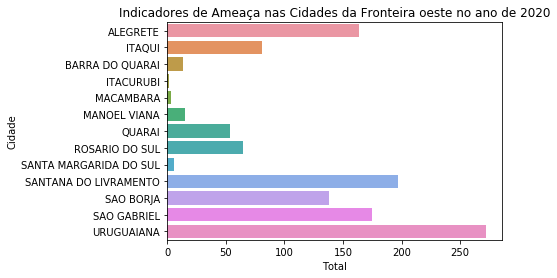

In [382]:
#GRÁFICO DE BARRAS - TOTAL DE VIOLÊNCIA POR MÊS EM 2020 
barra20 = sns.barplot(y=fronteiraOeste['Cidade'],x=fronteiraOeste['Total'])
title = plt.title("Indicadores de Ameaça nas Cidades da Fronteira oeste no ano de 2020")

### Índices de Lesão corporal na fronteira oeste em 2020

In [125]:
#Alocando dados de Ameaça de 2020 das Cidades da fronteira oeste 
alegrete = lesao_2020[lesao_2020['Cidade']=='ALEGRETE']
itaqui = lesao_2020[lesao_2020['Cidade']=='ITAQUI']
barraQuarai = lesao_2020[lesao_2020['Cidade']=='BARRA DO QUARAI']
itacurubi = lesao_2020[lesao_2020['Cidade']=='ITACURUBI']
macambara = lesao_2020[lesao_2020['Cidade']=='MACAMBARA']
manoelViana = lesao_2020[lesao_2020['Cidade']=='MANOEL VIANA']
quarai = lesao_2020[lesao_2020['Cidade']=='QUARAI']
rosario = lesao_2020[lesao_2020['Cidade']=='ROSARIO DO SUL']
margarida = lesao_2020[lesao_2020['Cidade']=='SANTA MARGARIDA DO SUL']
livramento = lesao_2020[lesao_2020['Cidade']=='SANTANA DO LIVRAMENTO']
borja  = lesao_2020[lesao_2020['Cidade']=='SAO BORJA']
gabriel = lesao_2020[lesao_2020['Cidade']=='SAO GABRIEL']
uruguaiana = lesao_2020[lesao_2020['Cidade']=='URUGUAIANA']

In [126]:
#Alocando dados de Estupro de 2019 das cidades da fronteira oeste 
fronteiraOeste = pd.DataFrame
fronteiraOeste = alegrete
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itaqui))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(barraQuarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itacurubi))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(macambara))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(manoelViana))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(quarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(rosario))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(margarida))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(livramento))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(borja))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(gabriel))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(uruguaiana))
fronteiraOeste

,Cidade,jan/20,fev/20,mar/20,abr/20,mai/20,jun/20,jul/20,ago/20,set/20,out/20,Total
5,ALEGRETE,18,8,10,10,9,6,7,13,8,10,89.0
213,ITAQUI,7,3,6,7,3,4,4,5,3,6,42.0
35,BARRA DO QUARAI,2,0,1,0,0,1,2,0,4,0,10.0
211,ITACURUBI,0,0,1,0,0,0,0,0,0,0,1.0
237,MACAMBARA,0,0,1,0,1,1,1,0,0,0,4.0
240,MANOEL VIANA,1,1,0,0,0,0,1,0,0,0,3.0
335,QUARAI,7,4,3,3,1,5,6,8,5,5,42.0
353,ROSARIO DO SUL,10,4,2,7,7,5,4,2,4,8,45.0
364,SANTA MARGARIDA DO SUL,1,0,0,0,0,0,0,0,0,1,1.0
371,SANTANA DO LIVRAMENTO,20,16,16,18,6,7,16,15,17,11,131.0


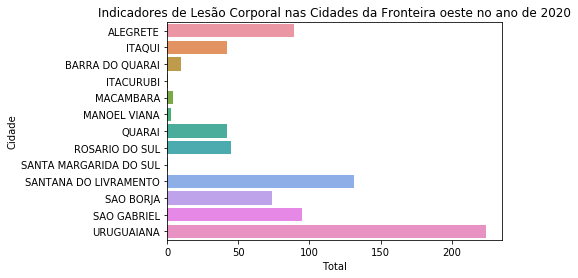

In [127]:
#GRÁFICO DE BARRAS - TOTAL DE VIOLÊNCIA POR MÊS EM 2020 
barra20 = sns.barplot(y=fronteiraOeste['Cidade'],x=fronteiraOeste['Total'])
title = plt.title("Indicadores de Lesão Corporal nas Cidades da Fronteira oeste no ano de 2020")

### Índices de Estupro na fronteira oeste em 2020

In [391]:
#Alocando dados de Ameaça de 2020 das Cidades da fronteira oeste 
alegrete = estupro_2020[estupro_2020['Cidade']=='ALEGRETE']
itaqui = estupro_2020[estupro_2020['Cidade']=='ITAQUI']
barraQuarai = estupro_2020[estupro_2020['Cidade']=='BARRA DO QUARAI']
itacurubi = estupro_2020[estupro_2020['Cidade']=='ITACURUBI']
macambara = estupro_2020[estupro_2020['Cidade']=='MACAMBARA']
manoelViana = estupro_2020[estupro_2020['Cidade']=='MANOEL VIANA']
quarai = estupro_2020[estupro_2020['Cidade']=='QUARAI']
rosario = estupro_2020[estupro_2020['Cidade']=='ROSARIO DO SUL']
margarida = estupro_2020[estupro_2020['Cidade']=='SANTA MARGARIDA DO SUL']
livramento = estupro_2020[estupro_2020['Cidade']=='SANTANA DO LIVRAMENTO']
borja  = estupro_2020[estupro_2020['Cidade']=='SAO BORJA']
gabriel = estupro_2020[estupro_2020['Cidade']=='SAO GABRIEL']
uruguaiana = estupro_2020[estupro_2020['Cidade']=='URUGUAIANA']

In [392]:
#Alocando dados de Estupro de 2019 das cidades da fronteira oeste 
fronteiraOeste = pd.DataFrame
fronteiraOeste = alegrete
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itaqui))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(barraQuarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itacurubi))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(macambara))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(manoelViana))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(quarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(rosario))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(margarida))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(livramento))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(borja))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(gabriel))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(uruguaiana))
fronteiraOeste

,Cidade,jan/20,fev/20,mar/20,abr/20,mai/20,jun/20,jul/20,ago/20,set/20,out/20,nov/20,Total
5,ALEGRETE,0,2,1,3,0,0,1,0,1,1,0,8.0
213,ITAQUI,0,2,2,0,0,0,0,0,1,2,0,5.0
35,BARRA DO QUARAI,1,0,0,0,0,0,0,0,0,0,0,1.0
211,ITACURUBI,0,0,0,0,0,0,0,0,0,1,0,0.0
237,MACAMBARA,0,0,0,0,0,0,0,1,0,0,0,1.0
240,MANOEL VIANA,0,0,0,0,0,0,0,0,0,0,0,0.0
335,QUARAI,0,1,0,2,0,0,0,1,0,0,0,4.0
353,ROSARIO DO SUL,0,0,1,3,1,0,0,0,1,0,0,6.0
364,SANTA MARGARIDA DO SUL,0,1,0,0,0,0,0,0,0,0,0,1.0
371,SANTANA DO LIVRAMENTO,1,1,3,5,1,1,1,0,0,2,0,13.0


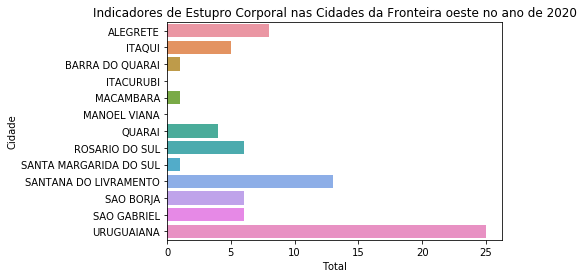

In [393]:
#GRÁFICO DE BARRAS - TOTAL DE VIOLÊNCIA POR MÊS EM 2020 
barra20 = sns.barplot(y=fronteiraOeste['Cidade'],x=fronteiraOeste['Total'])
title = plt.title("Indicadores de Estupro nas Cidades da Fronteira oeste no ano de 2020")

### Índices de Feminicídio consumado na fronteira oeste em 2019

In [169]:
#Alocando dados de Ameaça de 2020 das Cidades da fronteira oeste 
alegrete = consumado_2019[consumado_2019['Cidades']=='ALEGRETE']
itaqui = consumado_2019[consumado_2019['Cidades']=='ITAQUI']
barraQuarai = consumado_2019[consumado_2019['Cidades']=='BARRA DO QUARAI']
itacurubi = consumado_2019[consumado_2019['Cidades']=='ITACURUBI']
macambara = consumado_2019[consumado_2019['Cidades']=='MACAMBARA']
manoelViana = consumado_2019[consumado_2019['Cidades']=='MANOEL VIANA']
quarai = consumado_2019[consumado_2019['Cidades']=='QUARAI']
rosario = consumado_2019[consumado_2019['Cidades']=='ROSARIO DO SUL']
margarida = consumado_2019[consumado_2019['Cidades']=='SANTA MARGARIDA DO SUL']
livramento = consumado_2019[consumado_2019['Cidades']=='SANTANA DO LIVRAMENTO']
borja  = consumado_2019[consumado_2019['Cidades']=='SAO BORJA']
gabriel = consumado_2019[consumado_2019['Cidades']=='SAO GABRIEL']
uruguaiana = consumado_2019[consumado_2019['Cidades']=='URUGUAIANA']

In [170]:
#Alocando dados de Feminicídio Consumado de 2019 das cidades da fronteira oeste 
fronteiraOeste = pd.DataFrame
fronteiraOeste = alegrete
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itaqui))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(barraQuarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itacurubi))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(macambara))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(manoelViana))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(quarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(rosario))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(margarida))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(livramento))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(borja))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(gabriel))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(uruguaiana))
fronteiraOeste

,Cidades,jan/19,fev/19,mar/19,abr/19,mai/19,jun/19,jul/19,ago/19,set/19,out/19,nov/19,dez/19,Total
1,ALEGRETE,0,0,0,1,0,0,0,0,0,0,0,0,1
43,ROSARIO DO SUL,0,0,0,0,0,0,0,1,0,0,0,0,1
48,SAO BORJA,0,0,0,0,0,1,0,0,0,0,0,0,1
58,URUGUAIANA,0,0,1,0,0,0,1,0,1,0,0,0,3


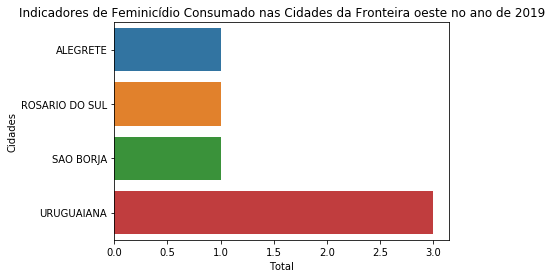

In [171]:
#GRÁFICO DE BARRAS - TOTAL DE VIOLÊNCIA POR MÊS EM 2020 
barra20 = sns.barplot(y=fronteiraOeste['Cidades'],x=fronteiraOeste['Total'])
title = plt.title("Indicadores de Feminicídio Consumado nas Cidades da Fronteira oeste no ano de 2019")

### Índices de Feminicídio consumado na fronteira oeste em 2020

In [394]:
#Alocando dados de Ameaça de 2020 das Cidades da fronteira oeste 
alegrete = consumado_2020[consumado_2020['Cidade']=='ALEGRETE']
itaqui = consumado_2020[consumado_2020['Cidade']=='ITAQUI']
barraQuarai = consumado_2020[consumado_2020['Cidade']=='BARRA DO QUARAI']
itacurubi = consumado_2020[consumado_2020['Cidade']=='ITACURUBI']
macambara = consumado_2020[consumado_2020['Cidade']=='MACAMBARA']
manoelViana = consumado_2020[consumado_2020['Cidade']=='MANOEL VIANA']
quarai = consumado_2020[consumado_2020['Cidade']=='QUARAI']
rosario = consumado_2020[consumado_2020['Cidade']=='ROSARIO DO SUL']
margarida = consumado_2020[consumado_2020['Cidade']=='SANTA MARGARIDA DO SUL']
livramento = consumado_2020[consumado_2020['Cidade']=='SANTANA DO LIVRAMENTO']
borja  = consumado_2020[consumado_2020['Cidade']=='SAO BORJA']
gabriel = consumado_2020[consumado_2020['Cidade']=='SAO GABRIEL']
uruguaiana = consumado_2020[consumado_2020['Cidade']=='URUGUAIANA']

In [395]:
#Alocando dados de Feminicídio Consumado de 2020 das cidades da fronteira oeste 
fronteiraOeste = pd.DataFrame
fronteiraOeste = alegrete
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itaqui))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(barraQuarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itacurubi))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(macambara))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(manoelViana))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(quarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(rosario))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(margarida))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(livramento))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(borja))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(gabriel))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(uruguaiana))
fronteiraOeste

,Cidade,jan/20,fev/20,mar/20,abr/20,mai/20,jun/20,jul/20,ago/20,set/20,out/20,nov/20,dez/20,Total
0,ALEGRETE,0,0,1,0,0,0,0,0,0,0,0.0,0.0,1
36,SANTANA DO LIVRAMENTO,0,0,0,0,0,1,0,0,0,0,0.0,0.0,1


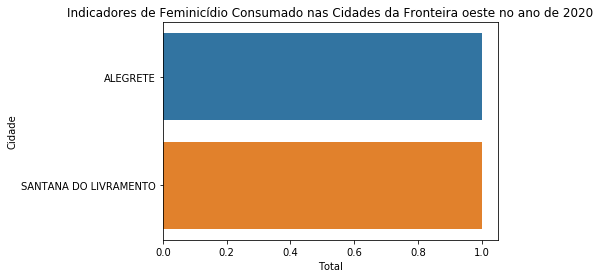

In [396]:
#GRÁFICO DE BARRAS - TOTAL DE VIOLÊNCIA POR MÊS EM 2020 
barra20 = sns.barplot(y=fronteiraOeste['Cidade'],x=fronteiraOeste['Total'])
title = plt.title("Indicadores de Feminicídio Consumado nas Cidades da Fronteira oeste no ano de 2020")

### Índices de Feminicídio tentado na fronteira oeste em 2020

In [39]:
#Alocando dados de Feminicídio de 2020 das Cidades da fronteira oeste 
alegrete = tentado_2020[tentado_2020['Cidade']=='ALEGRETE']
itaqui = tentado_2020[tentado_2020['Cidade']=='ITAQUI']
barraQuarai = tentado_2020[tentado_2020['Cidade']=='BARRA DO QUARAI']
itacurubi = tentado_2020[tentado_2020['Cidade']=='ITACURUBI']
macambara = tentado_2020[tentado_2020['Cidade']=='MACAMBARA']
manoelViana = tentado_2020[tentado_2020['Cidade']=='MANOEL VIANA']
quarai = tentado_2020[tentado_2020['Cidade']=='QUARAI']
rosario = tentado_2020[tentado_2020['Cidade']=='ROSARIO DO SUL']
margarida = tentado_2020[tentado_2020['Cidade']=='SANTA MARGARIDA DO SUL']
livramento = tentado_2020[tentado_2020['Cidade']=='SANTANA DO LIVRAMENTO']
borja  = tentado_2020[tentado_2020['Cidade']=='SAO BORJA']
gabriel = tentado_2020[tentado_2020['Cidade']=='SAO GABRIEL']
uruguaiana = tentado_2020[tentado_2020['Cidade']=='URUGUAIANA']

In [40]:
#Alocando dados de Feminicídio Tentado de 2019 das cidades da fronteira oeste 
fronteiraOeste = pd.DataFrame
fronteiraOeste = alegrete
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itaqui))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(barraQuarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itacurubi))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(macambara))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(manoelViana))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(quarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(rosario))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(margarida))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(livramento))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(borja))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(gabriel))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(uruguaiana))
fronteiraOeste

,Cidade,jan/20,fev/20,mar/20,abr/20,mai/20,jun/20,jul/20,ago/20,set/20,out/20,nov/20,dez/20,Total
1,ALEGRETE,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,1
60,QUARAI,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,0.0,2
68,SANTANA DO LIVRAMENTO,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0.0,0.0,2
75,SAO BORJA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,0.0,2
98,URUGUAIANA,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0,2,0.0,0.0,6


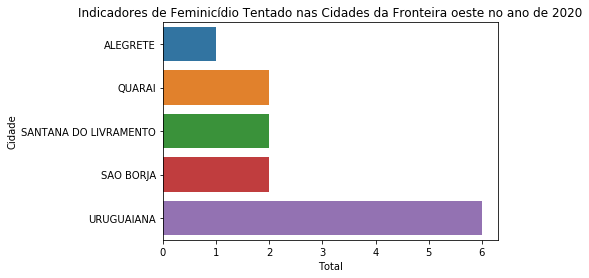

In [41]:
#GRÁFICO DE BARRAS - TOTAL DE VIOLÊNCIA POR MÊS EM 2020 
barra20 = sns.barplot(y=fronteiraOeste['Cidade'],x=fronteiraOeste['Total'])
title = plt.title("Indicadores de Feminicídio Tentado nas Cidades da Fronteira oeste no ano de 2020")

## Dados de Ameaça 2019 e 2020 Fronteira Oeste 

In [51]:
#Alocando dados de Ameaça de 2019 das Cidades da fronteira oeste 
alegrete = ameaca_2019[ameaca_2019['Cidades']=='ALEGRETE']
itaqui = ameaca_2019.loc[ameaca_2019['Cidades']=='ITAQUI']
barraQuarai = ameaca_2019.loc[ameaca_2019['Cidades']=='BARRA DO QUARAI']
itacurubi = ameaca_2019.loc[ameaca_2019['Cidades']=='ITACURUBI']
macambara = ameaca_2019.loc[ameaca_2019['Cidades']=='MACAMBARA']
manoelViana = ameaca_2019.loc[ameaca_2019['Cidades']=='MANOEL VIANA']
quarai = ameaca_2019.loc[ameaca_2019['Cidades']=='QUARAI']
rosario = ameaca_2019.loc[ameaca_2019['Cidades']=='ROSARIO DO SUL']
margarida = ameaca_2019.loc[ameaca_2019['Cidades']=='SANTA MARGARIDA DO SUL']
livramento = ameaca_2019.loc[ameaca_2019['Cidades']=='SANTANA DO LIVRAMENTO']
borja  = ameaca_2019.loc[ameaca_2019['Cidades']=='SAO BORJA']
gabriel = ameaca_2019.loc[ameaca_2019['Cidades']=='SAO GABRIEL']
uruguaiana = ameaca_2019.loc[ameaca_2019['Cidades']=='URUGUAIANA']

In [52]:
#Alocando dados de Ameaça de 2019 das cidades da fronteira oeste 
fronteiraOeste19 = pd.DataFrame
fronteiraOeste19 = alegrete
fronteiraOeste19 = fronteiraOeste19.append(pd.DataFrame(itaqui))
fronteiraOeste19 = fronteiraOeste19.append(pd.DataFrame(barraQuarai))
fronteiraOeste19 = fronteiraOeste19.append(pd.DataFrame(itacurubi))
fronteiraOeste19 = fronteiraOeste19.append(pd.DataFrame(macambara))
fronteiraOeste19 = fronteiraOeste19.append(pd.DataFrame(manoelViana))
fronteiraOeste19 = fronteiraOeste19.append(pd.DataFrame(quarai))
fronteiraOeste19 = fronteiraOeste19.append(pd.DataFrame(rosario))
fronteiraOeste19 = fronteiraOeste19.append(pd.DataFrame(margarida))
fronteiraOeste19 = fronteiraOeste19.append(pd.DataFrame(livramento))
fronteiraOeste19 = fronteiraOeste19.append(pd.DataFrame(borja))
fronteiraOeste19 = fronteiraOeste19.append(pd.DataFrame(gabriel))
fronteiraOeste19 = fronteiraOeste19.append(pd.DataFrame(uruguaiana))

In [54]:
#Alocando dados de Ameaça de 2020 das Cidades da fronteira oeste 
alegrete = ameaca_2020[ameaca_2020['Cidade']=='ALEGRETE']
itaqui = ameaca_2020[ameaca_2020['Cidade']=='ITAQUI']
barraQuarai = ameaca_2020[ameaca_2020['Cidade']=='BARRA DO QUARAI']
itacurubi = ameaca_2020[ameaca_2020['Cidade']=='ITACURUBI']
macambara = ameaca_2020[ameaca_2020['Cidade']=='MACAMBARA']
manoelViana = ameaca_2020[ameaca_2020['Cidade']=='MANOEL VIANA']
quarai = ameaca_2020[ameaca_2020['Cidade']=='QUARAI']
rosario = ameaca_2020.loc[ameaca_2020['Cidade']=='ROSARIO DO SUL']
margarida = ameaca_2020.loc[ameaca_2020['Cidade']=='SANTA MARGARIDA DO SUL']
livramento = ameaca_2020.loc[ameaca_2020['Cidade']=='SANTANA DO LIVRAMENTO']
borja  = ameaca_2020.loc[ameaca_2020['Cidade']=='SAO BORJA']
gabriel = ameaca_2020.loc[ameaca_2020['Cidade']=='SAO GABRIEL']
uruguaiana = ameaca_2020.loc[ameaca_2020['Cidade']=='URUGUAIANA']

In [55]:
#Alocando dados de Ameaça de 2020 das cidades da fronteira oeste 
fronteiraOeste20 = pd.DataFrame
fronteiraOeste20 = alegrete
fronteiraOeste20 = fronteiraOeste20.append(pd.DataFrame(itaqui))
fronteiraOeste20 = fronteiraOeste20.append(pd.DataFrame(barraQuarai))
fronteiraOeste20 = fronteiraOeste20.append(pd.DataFrame(itacurubi))
fronteiraOeste20 = fronteiraOeste20.append(pd.DataFrame(macambara))
fronteiraOeste20 = fronteiraOeste20.append(pd.DataFrame(manoelViana))
fronteiraOeste20 = fronteiraOeste20.append(pd.DataFrame(quarai))
fronteiraOeste20 = fronteiraOeste20.append(pd.DataFrame(rosario))
fronteiraOeste20 = fronteiraOeste20.append(pd.DataFrame(margarida))
fronteiraOeste20 = fronteiraOeste20.append(pd.DataFrame(livramento))
fronteiraOeste20 = fronteiraOeste20.append(pd.DataFrame(borja))
fronteiraOeste20 = fronteiraOeste20.append(pd.DataFrame(gabriel))
fronteiraOeste20 = fronteiraOeste20.append(pd.DataFrame(uruguaiana))

In [56]:
fronteira19 = ['Cidades','Total']
fronteira19 = fronteiraOeste19.filter(items= fronteira19)
fronteira19 = fronteira19.rename(columns = {'Total':'Total 2019'})

In [57]:
fronteira20 = ['Cidade','Total']
fronteira20 = fronteiraOeste20.filter(items= fronteira20)
fronteira20 = fronteira20.rename(columns = {'Total':'Total 2020'})

In [58]:
frames = [fronteira19, fronteira20['Total 2020']]
result = pd.concat(frames, axis=1)
result.index=result['Cidades']

Text(0.5, 1.0, 'Indicadores de Ameças da Fronteira Oeste')

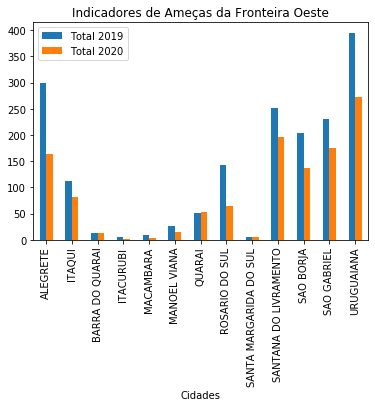

In [59]:
result.plot.bar()
plt.title("Indicadores de Ameças da Fronteira Oeste")


## Dados de Feminicídio Tentado 2019 e 2020 Fronteira Oeste 

In [103]:
#Alocando dados de Feminicídio Tentado de 2019 das Cidades da fronteira oeste 
alegrete = tentado_2019[tentado_2019['Cidades']=='ALEGRETE']
itaqui = tentado_2019.loc[tentado_2019['Cidades']=='ITAQUI']
barraQuarai = tentado_2019.loc[tentado_2019['Cidades']=='BARRA DO QUARAI']
itacurubi = tentado_2019.loc[tentado_2019['Cidades']=='ITACURUBI']
macambara = tentado_2019.loc[tentado_2019['Cidades']=='MACAMBARA']
manoelViana = tentado_2019.loc[tentado_2019['Cidades']=='MANOEL VIANA']
quarai = tentado_2019.loc[tentado_2019['Cidades']=='QUARAI']
rosario = tentado_2019.loc[tentado_2019['Cidades']=='ROSARIO DO SUL']
margarida = tentado_2019.loc[tentado_2019['Cidades']=='SANTA MARGARIDA DO SUL']
livramento = tentado_2019.loc[tentado_2019['Cidades']=='SANTANA DO LIVRAMENTO']
borja  = tentado_2019.loc[tentado_2019['Cidades']=='SAO BORJA']
gabriel = tentado_2019.loc[tentado_2019['Cidades']=='SAO GABRIEL']
uruguaiana = tentado_2019.loc[tentado_2019['Cidades']=='URUGUAIANA']

In [104]:
#Alocando dados de Feminicídio Tentado de 2019 das cidades da fronteira oeste 
fronteiraOeste19F = pd.DataFrame
fronteiraOeste19F = alegrete
fronteiraOeste19F = fronteiraOeste19F.append(pd.DataFrame(itaqui))
fronteiraOeste19F = fronteiraOeste19F.append(pd.DataFrame(barraQuarai))
fronteiraOeste19F = fronteiraOeste19F.append(pd.DataFrame(itacurubi))
fronteiraOeste19F = fronteiraOeste19F.append(pd.DataFrame(macambara))
fronteiraOeste19F = fronteiraOeste19F.append(pd.DataFrame(manoelViana))
fronteiraOeste19F = fronteiraOeste19F.append(pd.DataFrame(quarai))
fronteiraOeste19F= fronteiraOeste19F.append(pd.DataFrame(rosario))
fronteiraOeste19F = fronteiraOeste19F.append(pd.DataFrame(margarida))
fronteiraOeste19F = fronteiraOeste19F.append(pd.DataFrame(livramento))
fronteiraOeste19F = fronteiraOeste19F.append(pd.DataFrame(borja))
fronteiraOeste19F = fronteiraOeste19F.append(pd.DataFrame(gabriel))
fronteiraOeste19F = fronteiraOeste19F.append(pd.DataFrame(uruguaiana))
fronteiraOeste19F


,Cidades,jan/19,fev/19,mar/19,abr/19,mai/19,jun/19,jul/19,ago/19,set/19,out/19,nov/19,dez/19,Total
1,ALEGRETE,0,0,1,0,1,0,0,0,0,0,0,0,2
51,ITAQUI,0,1,0,0,0,0,0,0,0,0,0,0,1
79,ROSARIO DO SUL,1,0,1,0,0,0,0,0,0,0,0,0,2
88,SANTANA DO LIVRAMENTO,3,4,0,3,0,2,0,0,1,0,0,0,13
91,SAO BORJA,0,0,0,0,0,0,0,1,0,0,0,0,1
92,SAO GABRIEL,1,0,0,0,0,0,0,0,0,0,0,0,1
112,URUGUAIANA,1,0,0,0,0,0,0,0,0,0,0,1,2


In [105]:
#Alocando dados de Feminicídio tentado de 2020 das Cidades da fronteira oeste 
alegrete = tentado_2020[tentado_2020['Cidade']=='ALEGRETE']
itaqui =  tentado_2020[tentado_2020['Cidade']=='ITAQUI']
barraQuarai =  tentado_2020[tentado_2020['Cidade']=='BARRA DO QUARAI']
itacurubi =  tentado_2020[tentado_2020['Cidade']=='ITACURUBI']
macambara =  tentado_2020[tentado_2020['Cidade']=='MACAMBARA']
manoelViana =  tentado_2020[tentado_2020['Cidade']=='MANOEL VIANA']
quarai =  tentado_2020[tentado_2020['Cidade']=='QUARAI']
rosario =  tentado_2020[tentado_2020['Cidade']=='ROSARIO DO SUL']
margarida =  tentado_2020[tentado_2020['Cidade']=='SANTA MARGARIDA DO SUL']
livramento =  tentado_2020[tentado_2020['Cidade']=='SANTANA DO LIVRAMENTO']
borja  =  tentado_2020[tentado_2020['Cidade']=='SAO BORJA']
gabriel =  tentado_2020[tentado_2020['Cidade']=='SAO GABRIEL']
uruguaiana =  tentado_2020[tentado_2020['Cidade']=='URUGUAIANA']

In [106]:
#Alocando dados de Ameaça de 2020 das cidades da fronteira oeste 
fronteiraOeste20F = pd.DataFrame
fronteiraOeste20F = alegrete
fronteiraOeste20F = fronteiraOeste20F.append(pd.DataFrame(itaqui))
fronteiraOeste20F = fronteiraOeste20F.append(pd.DataFrame(barraQuarai))
fronteiraOeste20F = fronteiraOeste20F.append(pd.DataFrame(itacurubi))
fronteiraOeste20F = fronteiraOeste20F.append(pd.DataFrame(macambara))
fronteiraOeste20F = fronteiraOeste20F.append(pd.DataFrame(manoelViana))
fronteiraOeste20F = fronteiraOeste20F.append(pd.DataFrame(quarai))
fronteiraOeste20F = fronteiraOeste20F.append(pd.DataFrame(rosario))
fronteiraOeste20F = fronteiraOeste20F.append(pd.DataFrame(margarida))
fronteiraOeste20F = fronteiraOeste20F.append(pd.DataFrame(livramento))
fronteiraOeste20F = fronteiraOeste20F.append(pd.DataFrame(borja))
fronteiraOeste20F = fronteiraOeste20F.append(pd.DataFrame(gabriel))
fronteiraOeste20F = fronteiraOeste20F.append(pd.DataFrame(uruguaiana))
fronteiraOeste20F


,Cidade,jan/20,fev/20,mar/20,abr/20,mai/20,jun/20,jul/20,ago/20,set/20,out/20,nov/20,dez/20,Total
1,ALEGRETE,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,1
60,QUARAI,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,0.0,2
68,SANTANA DO LIVRAMENTO,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0.0,0.0,2
75,SAO BORJA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,0.0,2
98,URUGUAIANA,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0,2,0.0,0.0,6


In [107]:
fronteira19F = ['Cidades','Total']
fronteira19F = fronteiraOeste19F.filter(items= fronteira19F)
fronteira19F = fronteira19.rename(columns = {'Total':'Total 2019'})
fronteira20F = ['Cidade','Total']
fronteira20F = fronteiraOeste20F.filter(items= fronteira20F)
fronteira20F = fronteira20F.rename(columns = {'Total':'Total 2020'})

In [110]:
frames = [fronteira19F, fronteira20F['Total 2020']]
result = pd.concat(frames, axis=1)
result.index=result['Cidades']

Text(0.5, 1.0, 'Indicadores de Feminicídio Tentado da Fronteira Oeste')

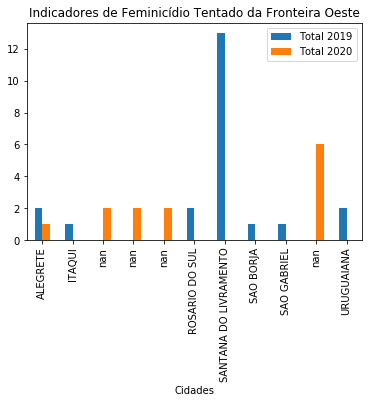

In [111]:
result.plot.bar()
plt.title("Indicadores de Feminicídio Tentado da Fronteira Oeste")


In [ ]:
#Obs: O gráfico acima apresenta um erro com algumas cidades faltantes, devido a inconsistência da base de dados.

## Estudo voltado para o mês com maior índices de violência 

In [128]:
#Alocando dados de Ameaça de 2019 das Cidades da fronteira oeste 
alegrete = ameaca_2019[ameaca_2019['Cidades']=='ALEGRETE']
itaqui = ameaca_2019.loc[ameaca_2019['Cidades']=='ITAQUI']
barraQuarai = ameaca_2019.loc[ameaca_2019['Cidades']=='BARRA DO QUARAI']
itacurubi = ameaca_2019.loc[ameaca_2019['Cidades']=='ITACURUBI']
macambara = ameaca_2019.loc[ameaca_2019['Cidades']=='MACAMBARA']
manoelViana = ameaca_2019.loc[ameaca_2019['Cidades']=='MANOEL VIANA']
quarai = ameaca_2019.loc[ameaca_2019['Cidades']=='QUARAI']
rosario = ameaca_2019.loc[ameaca_2019['Cidades']=='ROSARIO DO SUL']
margarida = ameaca_2019.loc[ameaca_2019['Cidades']=='SANTA MARGARIDA DO SUL']
livramento = ameaca_2019.loc[ameaca_2019['Cidades']=='SANTANA DO LIVRAMENTO']
borja  = ameaca_2019.loc[ameaca_2019['Cidades']=='SAO BORJA']
gabriel = ameaca_2019.loc[ameaca_2019['Cidades']=='SAO GABRIEL']
uruguaiana = ameaca_2019.loc[ameaca_2019['Cidades']=='URUGUAIANA']


In [129]:
#Alocando dados de Ameaça de 2019 das cidades da fronteira oeste 
fronteiraOeste = pd.DataFrame
fronteiraOeste = alegrete
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itaqui))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(barraQuarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itacurubi))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(macambara))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(manoelViana))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(quarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(rosario))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(margarida))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(livramento))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(borja))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(gabriel))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(uruguaiana))
fronteiraOeste

,Cidades,jan/19,fev/19,mar/19,abr/19,mai/19,jun/19,jul/19,ago/19,set/19,out/19,nov/19,dez/19,Total
5,ALEGRETE,32,39,39,21,31,22,19,18,18,24,15,21,299
213,ITAQUI,16,10,8,6,9,7,10,4,11,12,8,12,113
35,BARRA DO QUARAI,0,2,2,0,1,0,0,1,1,2,3,1,13
211,ITACURUBI,0,0,0,0,0,1,1,0,1,1,1,0,5
237,MACAMBARA,1,1,0,1,0,0,2,0,0,1,1,2,9
240,MANOEL VIANA,1,1,3,3,1,1,3,2,1,3,4,3,26
335,QUARAI,9,2,3,3,3,5,4,4,5,5,4,5,52
353,ROSARIO DO SUL,14,18,13,12,7,10,14,8,14,9,11,13,143
364,SANTA MARGARIDA DO SUL,0,0,1,1,0,1,0,0,0,0,0,2,5
371,SANTANA DO LIVRAMENTO,21,21,29,25,18,18,17,17,23,23,21,19,252


In [130]:
#Colocando pivô no dataframe
fronteiraOesteAmeaca = fronteiraOeste.pivot( "Cidades","jan/19","jan/19")
fronteiraOesteAmeaca = fronteiraOesteAmeaca.replace(np.nan,0)
fronteiraOesteAmeaca

jan/19,0,1,9,14,16,18,21,23,31,32
Cidades,,,,,,,,,,
ALEGRETE,0,0,0,0,0,0,0,0,0,32
BARRA DO QUARAI,0,0,0,0,0,0,0,0,0,0
ITACURUBI,0,0,0,0,0,0,0,0,0,0
ITAQUI,0,0,0,0,16,0,0,0,0,0
MACAMBARA,0,1,0,0,0,0,0,0,0,0
MANOEL VIANA,0,1,0,0,0,0,0,0,0,0
QUARAI,0,0,9,0,0,0,0,0,0,0
ROSARIO DO SUL,0,0,0,14,0,0,0,0,0,0
SANTA MARGARIDA DO SUL,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1, 'Indicadores de Ameaça na Fronteira Oeste em janeiro 2019')

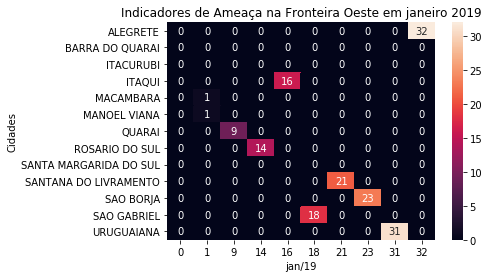

In [131]:
sns.heatmap(fronteiraOesteAmeaca, annot=True,fmt='d')
plt.title("Indicadores de Ameaça na Fronteira Oeste em janeiro 2019")


#### Quais cidades possuem maiores e menores índices de lesão corporal na fronteira oeste em janeiro de 2019?


In [132]:
#Alocando dados de Lesão de 2019 das Cidades da fronteira oeste 
alegrete = lesao_2019[lesao_2019['Cidades']=='ALEGRETE']
itaqui = lesao_2019.loc[lesao_2019['Cidades']=='ITAQUI']
barraQuarai = lesao_2019.loc[lesao_2019['Cidades']=='BARRA DO QUARAI']
itacurubi = lesao_2019.loc[lesao_2019['Cidades']=='ITACURUBI']
macambara = lesao_2019.loc[lesao_2019['Cidades']=='MACAMBARA']
manoelViana = lesao_2019.loc[lesao_2019['Cidades']=='MANOEL VIANA']
quarai = lesao_2019.loc[lesao_2019['Cidades']=='QUARAI']
rosario = lesao_2019.loc[lesao_2019['Cidades']=='ROSARIO DO SUL']
margarida = lesao_2019.loc[lesao_2019['Cidades']=='SANTA MARGARIDA DO SUL']
livramento = lesao_2019.loc[lesao_2019['Cidades']=='SANTANA DO LIVRAMENTO']
borja  = lesao_2019.loc[lesao_2019['Cidades']=='SAO BORJA']
gabriel = lesao_2019.loc[lesao_2019['Cidades']=='SAO GABRIEL']
uruguaiana = lesao_2019.loc[lesao_2019['Cidades']=='URUGUAIANA']

In [133]:
#Alocando dados de Lesão de 2019 das cidades da fronteira oeste 
fronteiraOeste = pd.DataFrame
fronteiraOeste = alegrete
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itaqui))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(barraQuarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itacurubi))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(macambara))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(manoelViana))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(quarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(rosario))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(margarida))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(livramento))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(borja))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(gabriel))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(uruguaiana))
fronteiraOeste

,Cidades,jan/19,fev/19,mar/19,abr/19,mai/19,jun/19,jul/19,ago/19,set/19,out/19,nov/19,dez/19,Total
5,ALEGRETE,14,18,13,11,5,15,7,11,12,8,14,14,142
213,ITAQUI,9,4,10,7,6,8,0,3,5,0,7,8,67
35,BARRA DO QUARAI,1,1,1,0,0,1,1,0,0,1,2,0,8
211,ITACURUBI,0,1,1,0,0,0,0,0,0,1,0,2,5
237,MACAMBARA,0,0,0,0,0,0,0,0,2,1,0,2,5
240,MANOEL VIANA,1,0,1,0,2,0,0,5,1,0,2,7,19
335,QUARAI,3,6,3,4,7,8,4,7,9,3,4,4,62
353,ROSARIO DO SUL,10,5,9,3,4,5,3,3,4,5,7,18,76
364,SANTA MARGARIDA DO SUL,0,2,0,0,1,0,0,0,0,0,0,1,4
371,SANTANA DO LIVRAMENTO,7,15,16,23,14,14,10,9,15,12,14,27,176


In [134]:
#Colocando pivô no dataframe
fronteiraOesteLesao = fronteiraOeste.pivot( "Cidades","jan/19","jan/19")
fronteiraOesteLesao = fronteiraOesteLesao.replace(np.nan,0)
fronteiraOesteLesao

jan/19,0,1,3,7,9,10,13,14,32
Cidades,,,,,,,,,
ALEGRETE,0,0,0,0,0,0,0,14,0
BARRA DO QUARAI,0,1,0,0,0,0,0,0,0
ITACURUBI,0,0,0,0,0,0,0,0,0
ITAQUI,0,0,0,0,9,0,0,0,0
MACAMBARA,0,0,0,0,0,0,0,0,0
MANOEL VIANA,0,1,0,0,0,0,0,0,0
QUARAI,0,0,3,0,0,0,0,0,0
ROSARIO DO SUL,0,0,0,0,0,10,0,0,0
SANTA MARGARIDA DO SUL,0,0,0,0,0,0,0,0,0


Text(0.5, 1, 'Indicadores de Lesão Corporal na Fronteira Oeste em janeiro 2019')

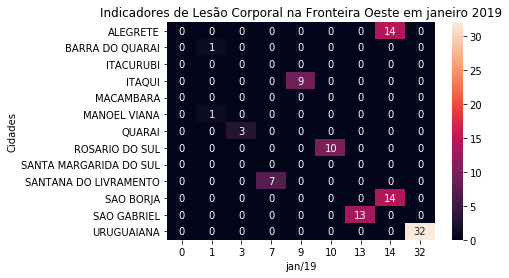

In [135]:
sns.heatmap(fronteiraOesteLesao, annot=True,fmt='d')
plt.title("Indicadores de Lesão Corporal na Fronteira Oeste em janeiro 2019")


#### Quais cidades possuem maiores e menores índices de Estupro na fronteira oeste em janeiro de 2019?


In [136]:
#Alocando dados de Estupro de 2019 das Cidades da fronteira oeste 
alegrete = estupro_2019[estupro_2019['Cidades']=='ALEGRETE']
itaqui = estupro_2019[estupro_2019['Cidades']=='ITAQUI']
barraQuarai = estupro_2019[estupro_2019['Cidades']=='BARRA DO QUARAI']
itacurubi = estupro_2019[estupro_2019['Cidades']=='ITACURUBI']
macambara = estupro_2019[estupro_2019['Cidades']=='MACAMBARA']
manoelViana = estupro_2019[estupro_2019['Cidades']=='MANOEL VIANA']
quarai = estupro_2019[estupro_2019['Cidades']=='QUARAI']
rosario = estupro_2019[estupro_2019['Cidades']=='ROSARIO DO SUL']
margarida = estupro_2019[estupro_2019['Cidades']=='SANTA MARGARIDA DO SUL']
livramento = estupro_2019[estupro_2019['Cidades']=='SANTANA DO LIVRAMENTO']
borja  = estupro_2019[estupro_2019['Cidades']=='SAO BORJA']
gabriel = estupro_2019[estupro_2019['Cidades']=='SAO GABRIEL']
uruguaiana = estupro_2019[estupro_2019['Cidades']=='URUGUAIANA']

In [137]:
#Alocando dados de Estupro de 2019 das cidades da fronteira oeste 
fronteiraOeste = pd.DataFrame
fronteiraOeste = alegrete
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itaqui))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(barraQuarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itacurubi))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(macambara))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(manoelViana))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(quarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(rosario))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(margarida))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(livramento))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(borja))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(gabriel))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(uruguaiana))
fronteiraOeste

,Cidades,jan/19,fev/19,mar/19,abr/19,mai/19,jun/19,jul/19,ago/19,set/19,out/19,nov/19,dez/19,Total
5,ALEGRETE,0,0,1,0,2,2,1,1,1,0,1,0,9
213,ITAQUI,0,0,0,0,0,0,1,1,0,2,1,2,7
35,BARRA DO QUARAI,0,0,0,0,0,0,0,0,0,0,0,0,0
211,ITACURUBI,0,0,0,0,0,0,0,0,0,0,0,0,0
237,MACAMBARA,0,0,0,0,0,0,0,0,0,0,0,0,0
240,MANOEL VIANA,0,0,0,0,0,0,0,0,0,0,0,0,0
335,QUARAI,0,1,0,0,0,0,0,1,0,0,0,0,2
353,ROSARIO DO SUL,1,0,0,0,0,0,1,0,0,0,1,0,3
364,SANTA MARGARIDA DO SUL,0,0,0,0,0,0,0,0,0,1,0,0,1
371,SANTANA DO LIVRAMENTO,2,1,0,0,0,0,1,0,1,2,0,2,9


In [138]:
#Colocando pivô no dataframe
fronteiraOesteEstupro = fronteiraOeste.pivot( "Cidades","jan/19","jan/19")
fronteiraOesteEstupro = fronteiraOesteEstupro.replace(np.nan,0)
fronteiraOesteEstupro

jan/19,0,1,2,5
Cidades,,,,
ALEGRETE,0,0,0,0
BARRA DO QUARAI,0,0,0,0
ITACURUBI,0,0,0,0
ITAQUI,0,0,0,0
MACAMBARA,0,0,0,0
MANOEL VIANA,0,0,0,0
QUARAI,0,0,0,0
ROSARIO DO SUL,0,1,0,0
SANTA MARGARIDA DO SUL,0,0,0,0


Text(0.5, 1, 'Indicadores de Estupro na Fronteira Oeste em janeiro 2019')

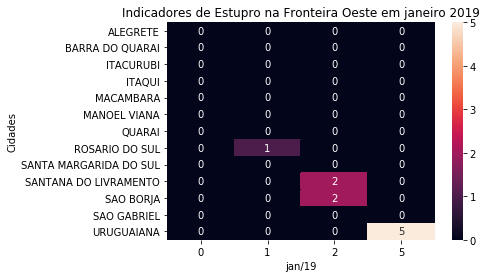

In [139]:
sns.heatmap(fronteiraOesteEstupro, annot=True,fmt='d')
plt.title("Indicadores de Estupro na Fronteira Oeste em janeiro 2019")


#### Quais cidades possuem maiores e menores índices de Feminicídio consumado na fronteira oeste em janeiro de 2019?


In [140]:
#Alocando dados de Feminicídio consumado de 2019 das Cidades da fronteira oeste 
alegrete = consumado_2019[consumado_2019['Cidades']=='ALEGRETE']
itaqui = consumado_2019[consumado_2019['Cidades']=='ITAQUI']
barraQuarai = consumado_2019[consumado_2019['Cidades']=='BARRA DO QUARAI']
itacurubi = consumado_2019[consumado_2019['Cidades']=='ITACURUBI']
macambara = consumado_2019[consumado_2019['Cidades']=='MACAMBARA']
manoelViana = consumado_2019[consumado_2019['Cidades']=='MANOEL VIANA']
quarai = consumado_2019[consumado_2019['Cidades']=='QUARAI']
rosario = consumado_2019[consumado_2019['Cidades']=='ROSARIO DO SUL']
margarida = consumado_2019[consumado_2019['Cidades']=='SANTA MARGARIDA DO SUL']
livramento = consumado_2019[consumado_2019['Cidades']=='SANTANA DO LIVRAMENTO']
borja  = consumado_2019[consumado_2019['Cidades']=='SAO BORJA']
gabriel = consumado_2019[consumado_2019['Cidades']=='SAO GABRIEL']
uruguaiana = consumado_2019[consumado_2019['Cidades']=='URUGUAIANA']

In [141]:
#Alocando dados de Estupro de 2019 das cidades da fronteira oeste 
fronteiraOeste = pd.DataFrame
fronteiraOeste = alegrete
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itaqui))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(barraQuarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itacurubi))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(macambara))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(manoelViana))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(quarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(rosario))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(margarida))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(livramento))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(borja))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(gabriel))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(uruguaiana))
fronteiraOeste

,Cidades,jan/19,fev/19,mar/19,abr/19,mai/19,jun/19,jul/19,ago/19,set/19,out/19,nov/19,dez/19,Total
1,ALEGRETE,0,0,0,1,0,0,0,0,0,0,0,0,1
43,ROSARIO DO SUL,0,0,0,0,0,0,0,1,0,0,0,0,1
48,SAO BORJA,0,0,0,0,0,1,0,0,0,0,0,0,1
58,URUGUAIANA,0,0,1,0,0,0,1,0,1,0,0,0,3


In [142]:
#Colocando pivô no dataframe
fronteiraOesteConsumado = fronteiraOeste.pivot( "Cidades","jan/19","jan/19")
fronteiraOesteConsumado = fronteiraOesteConsumado.replace(np.nan,0)
fronteiraOesteConsumado

jan/19,0
Cidades,
ALEGRETE,0
ROSARIO DO SUL,0
SAO BORJA,0
URUGUAIANA,0


Text(0.5, 1, 'Indicadores de Feminicídio Consumado na Fronteira Oeste em janeiro 2019')

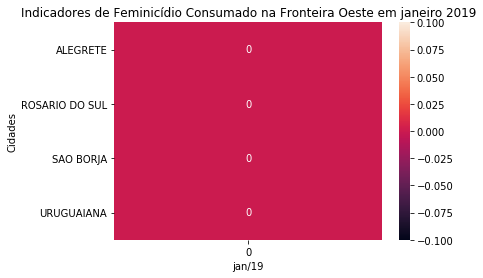

In [143]:
sns.heatmap(fronteiraOesteConsumado, annot=True,fmt='d')
plt.title("Indicadores de Feminicídio Consumado na Fronteira Oeste em janeiro 2019")


#### Quais cidades possuem maiores e menores índices de Feminicídio tentado na fronteira oeste em janeiro de 2019?


In [144]:
#Alocando dados de Feminicídio tentado de 2019 das Cidades da fronteira oeste 
alegrete = tentado_2019[tentado_2019['Cidades']=='ALEGRETE']
itaqui = tentado_2019[tentado_2019['Cidades']=='ITAQUI']
barraQuarai = tentado_2019[tentado_2019['Cidades']=='BARRA DO QUARAI']
itacurubi = tentado_2019[tentado_2019['Cidades']=='ITACURUBI']
macambara = tentado_2019[tentado_2019['Cidades']=='MACAMBARA']
manoelViana = tentado_2019[tentado_2019['Cidades']=='MANOEL VIANA']
quarai = tentado_2019[tentado_2019['Cidades']=='QUARAI']
rosario = tentado_2019[tentado_2019['Cidades']=='ROSARIO DO SUL']
margarida = tentado_2019[tentado_2019['Cidades']=='SANTA MARGARIDA DO SUL']
livramento = tentado_2019[tentado_2019['Cidades']=='SANTANA DO LIVRAMENTO']
borja  = tentado_2019[tentado_2019['Cidades']=='SAO BORJA']
gabriel = tentado_2019[tentado_2019['Cidades']=='SAO GABRIEL']
uruguaiana = tentado_2019[tentado_2019['Cidades']=='URUGUAIANA']

In [145]:
#Alocando dados de Feminicídio tentado de 2019 das cidades da fronteira oeste 
fronteiraOeste = pd.DataFrame
fronteiraOeste = alegrete
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itaqui))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(barraQuarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itacurubi))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(macambara))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(manoelViana))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(quarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(rosario))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(margarida))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(livramento))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(borja))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(gabriel))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(uruguaiana))
fronteiraOeste

,Cidades,jan/19,fev/19,mar/19,abr/19,mai/19,jun/19,jul/19,ago/19,set/19,out/19,nov/19,dez/19,Total
1,ALEGRETE,0,0,1,0,1,0,0,0,0,0,0,0,2
51,ITAQUI,0,1,0,0,0,0,0,0,0,0,0,0,1
79,ROSARIO DO SUL,1,0,1,0,0,0,0,0,0,0,0,0,2
88,SANTANA DO LIVRAMENTO,3,4,0,3,0,2,0,0,1,0,0,0,13
91,SAO BORJA,0,0,0,0,0,0,0,1,0,0,0,0,1
92,SAO GABRIEL,1,0,0,0,0,0,0,0,0,0,0,0,1
112,URUGUAIANA,1,0,0,0,0,0,0,0,0,0,0,1,2


In [146]:
#Colocando pivô no dataframe
fronteiraOesteTentado = fronteiraOeste.pivot( "Cidades","jan/19","jan/19")
fronteiraOesteTentado = fronteiraOesteTentado.replace(np.nan,0)
fronteiraOesteTentado

jan/19,0,1,3
Cidades,,,
ALEGRETE,0.0,0.0,0.0
ITAQUI,0.0,0.0,0.0
ROSARIO DO SUL,0.0,1.0,0.0
SANTANA DO LIVRAMENTO,0.0,0.0,3.0
SAO BORJA,0.0,0.0,0.0
SAO GABRIEL,0.0,1.0,0.0
URUGUAIANA,0.0,1.0,0.0


Text(0.5, 1, 'Indicadores de Feminicídio Tentado na Fronteira Oeste em janeiro 2019')

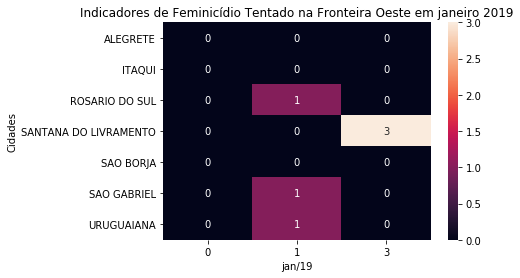

In [147]:
sns.heatmap(fronteiraOesteTentado, annot=True)
plt.title("Indicadores de Feminicídio Tentado na Fronteira Oeste em janeiro 2019")


#### Quais cidades possuem maiores e menores índices de Ameaça na fronteira oeste em janeiro de 2020?


In [148]:
#Alocando dados de Feminicídio tentado de 2020 das Cidades da fronteira oeste 
alegrete = ameaca_2020[ameaca_2020['Cidade']=='ALEGRETE']
itaqui = ameaca_2020[ameaca_2020['Cidade']=='ITAQUI']
barraQuarai = ameaca_2020[ameaca_2020['Cidade']=='BARRA DO QUARAI']
itacurubi = ameaca_2020[ameaca_2020['Cidade']=='ITACURUBI']
macambara = ameaca_2020[ameaca_2020['Cidade']=='MACAMBARA']
manoelViana = ameaca_2020[ameaca_2020['Cidade']=='MANOEL VIANA']
quarai = ameaca_2020[ameaca_2020['Cidade']=='QUARAI']
rosario = ameaca_2020[ameaca_2020['Cidade']=='ROSARIO DO SUL']
margarida = ameaca_2020[ameaca_2020['Cidade']=='SANTA MARGARIDA DO SUL']
livramento = ameaca_2020[ameaca_2020['Cidade']=='SANTANA DO LIVRAMENTO']
borja  = ameaca_2020[ameaca_2020['Cidade']=='SAO BORJA']
gabriel = ameaca_2020[ameaca_2020['Cidade']=='SAO GABRIEL']
uruguaiana = ameaca_2020[ameaca_2020['Cidade']=='URUGUAIANA']

In [149]:
#Alocando dados de Estupro de 2020 das cidades da fronteira oeste 
fronteiraOeste = pd.DataFrame
fronteiraOeste = alegrete
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itaqui))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(barraQuarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itacurubi))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(macambara))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(manoelViana))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(quarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(rosario))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(margarida))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(livramento))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(borja))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(gabriel))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(uruguaiana))
fronteiraOeste

,Cidade,jan/20,fev/20,mar/20,abr/20,mai/20,jun/20,jul/20,ago/20,set/20,out/20,Total
5,ALEGRETE,22,27,20,20,15,21,9,9,21,18,164.0
213,ITAQUI,16,13,7,6,7,7,7,9,9,18,81.0
35,BARRA DO QUARAI,5,0,0,0,0,2,1,4,2,2,14.0
211,ITACURUBI,0,1,1,0,0,0,0,0,0,0,2.0
237,MACAMBARA,1,0,0,0,1,0,1,0,0,1,3.0
240,MANOEL VIANA,0,2,3,3,0,1,2,2,2,1,15.0
335,QUARAI,9,6,9,2,9,6,3,5,5,7,54.0
353,ROSARIO DO SUL,14,10,7,6,8,9,4,4,3,12,65.0
364,SANTA MARGARIDA DO SUL,1,0,3,0,1,0,0,0,1,0,6.0
371,SANTANA DO LIVRAMENTO,40,37,15,12,17,21,23,16,16,7,197.0


In [150]:
#Colocando pivô no dataframe
fronteiraOesteAmeaca = fronteiraOeste.pivot( "Cidade","jan/20","jan/20")
fronteiraOesteAmeaca = fronteiraOesteAmeaca.replace(np.nan,0)
fronteiraOesteAmeaca

jan/20,0,1,5,9,14,16,20,22,25,30,40
Cidade,,,,,,,,,,,
ALEGRETE,0,0,0,0,0,0,0,22,0,0,0
BARRA DO QUARAI,0,0,5,0,0,0,0,0,0,0,0
ITACURUBI,0,0,0,0,0,0,0,0,0,0,0
ITAQUI,0,0,0,0,0,16,0,0,0,0,0
MACAMBARA,0,1,0,0,0,0,0,0,0,0,0
MANOEL VIANA,0,0,0,0,0,0,0,0,0,0,0
QUARAI,0,0,0,9,0,0,0,0,0,0,0
ROSARIO DO SUL,0,0,0,0,14,0,0,0,0,0,0
SANTA MARGARIDA DO SUL,0,1,0,0,0,0,0,0,0,0,0


Text(0.5, 1, 'Indicadores de Ameaça na Fronteira Oeste em janeiro 2020')

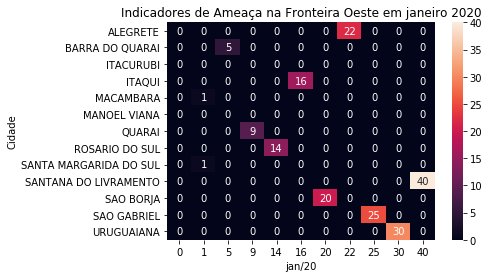

In [151]:
sns.heatmap(fronteiraOesteAmeaca, annot=True,fmt='d')
plt.title("Indicadores de Ameaça na Fronteira Oeste em janeiro 2020")


#### Quais cidades possuem maiores e menores índices de Lesão corporal na fronteira oeste em janeiro de 2020?


In [152]:
#Alocando dados de Lesão de 2020 das Cidades da fronteira oeste 
alegrete = lesao_2020[lesao_2020['Cidade']=='ALEGRETE']
itaqui = lesao_2020[lesao_2020['Cidade']=='ITAQUI']
barraQuarai = lesao_2020[lesao_2020['Cidade']=='BARRA DO QUARAI']
itacurubi = lesao_2020[lesao_2020['Cidade']=='ITACURUBI']
macambara = lesao_2020[lesao_2020['Cidade']=='MACAMBARA']
manoelViana = lesao_2020[lesao_2020['Cidade']=='MANOEL VIANA']
quarai = lesao_2020[lesao_2020['Cidade']=='QUARAI']
rosario = lesao_2020[lesao_2020['Cidade']=='ROSARIO DO SUL']
margarida = lesao_2020[lesao_2020['Cidade']=='SANTA MARGARIDA DO SUL']
livramento = lesao_2020[lesao_2020['Cidade']=='SANTANA DO LIVRAMENTO']
borja  = lesao_2020[lesao_2020['Cidade']=='SAO BORJA']
gabriel = lesao_2020[lesao_2020['Cidade']=='SAO GABRIEL']
uruguaiana = lesao_2020[lesao_2020['Cidade']=='URUGUAIANA']

In [153]:
#Alocando dados de Estupro de 2020 das cidades da fronteira oeste 
fronteiraOeste = pd.DataFrame
fronteiraOeste = alegrete
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itaqui))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(barraQuarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itacurubi))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(macambara))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(manoelViana))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(quarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(rosario))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(margarida))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(livramento))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(borja))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(gabriel))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(uruguaiana))
fronteiraOeste

,Cidade,jan/20,fev/20,mar/20,abr/20,mai/20,jun/20,jul/20,ago/20,set/20,out/20,Total
5,ALEGRETE,18,8,10,10,9,6,7,13,8,10,89.0
213,ITAQUI,7,3,6,7,3,4,4,5,3,6,42.0
35,BARRA DO QUARAI,2,0,1,0,0,1,2,0,4,0,10.0
211,ITACURUBI,0,0,1,0,0,0,0,0,0,0,1.0
237,MACAMBARA,0,0,1,0,1,1,1,0,0,0,4.0
240,MANOEL VIANA,1,1,0,0,0,0,1,0,0,0,3.0
335,QUARAI,7,4,3,3,1,5,6,8,5,5,42.0
353,ROSARIO DO SUL,10,4,2,7,7,5,4,2,4,8,45.0
364,SANTA MARGARIDA DO SUL,1,0,0,0,0,0,0,0,0,1,1.0
371,SANTANA DO LIVRAMENTO,20,16,16,18,6,7,16,15,17,11,131.0


In [154]:
#Colocando pivô no dataframe
fronteiraOesteLesao = fronteiraOeste.pivot( "Cidade","jan/20","jan/20")
fronteiraOesteLesao = fronteiraOesteLesao.replace(np.nan,0)
fronteiraOesteLesao

jan/20,0,1,2,7,8,10,18,20,21,25
Cidade,,,,,,,,,,
ALEGRETE,0,0,0,0,0,0,18,0,0,0
BARRA DO QUARAI,0,0,2,0,0,0,0,0,0,0
ITACURUBI,0,0,0,0,0,0,0,0,0,0
ITAQUI,0,0,0,7,0,0,0,0,0,0
MACAMBARA,0,0,0,0,0,0,0,0,0,0
MANOEL VIANA,0,1,0,0,0,0,0,0,0,0
QUARAI,0,0,0,7,0,0,0,0,0,0
ROSARIO DO SUL,0,0,0,0,0,10,0,0,0,0
SANTA MARGARIDA DO SUL,0,1,0,0,0,0,0,0,0,0


Text(0.5, 1, 'Indicadores de Lesão corporal na Fronteira Oeste em janeiro 2020')

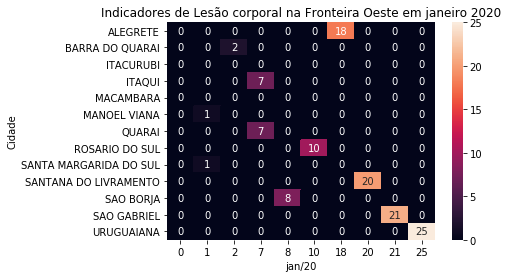

In [155]:
sns.heatmap(fronteiraOesteLesao, annot=True,fmt='d')
plt.title("Indicadores de Lesão corporal na Fronteira Oeste em janeiro 2020")


#### Quais cidades possuem maiores e menores índices de Estupro tentado na fronteira oeste em janeiro de 2020?


In [156]:
#Alocando dados de Feminicídio tentado de 2020 das Cidades da fronteira oeste 
alegrete = estupro_2020[estupro_2020['Cidade']=='ALEGRETE']
itaqui = estupro_2020[estupro_2020['Cidade']=='ITAQUI']
barraQuarai = estupro_2020[estupro_2020['Cidade']=='BARRA DO QUARAI']
itacurubi = estupro_2020[estupro_2020['Cidade']=='ITACURUBI']
macambara = estupro_2020[estupro_2020['Cidade']=='MACAMBARA']
manoelViana = estupro_2020[estupro_2020['Cidade']=='MANOEL VIANA']
quarai = estupro_2020[estupro_2020['Cidade']=='QUARAI']
rosario = estupro_2020[estupro_2020['Cidade']=='ROSARIO DO SUL']
margarida = estupro_2020[estupro_2020['Cidade']=='SANTA MARGARIDA DO SUL']
livramento = estupro_2020[estupro_2020['Cidade']=='SANTANA DO LIVRAMENTO']
borja  = estupro_2020[estupro_2020['Cidade']=='SAO BORJA']
gabriel = estupro_2020[estupro_2020['Cidade']=='SAO GABRIEL']
uruguaiana = estupro_2020[estupro_2020['Cidade']=='URUGUAIANA']

In [157]:
#Alocando dados de Estupro de 2020 das cidades da fronteira oeste 
fronteiraOeste = pd.DataFrame
fronteiraOeste = alegrete
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itaqui))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(barraQuarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itacurubi))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(macambara))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(manoelViana))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(quarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(rosario))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(margarida))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(livramento))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(borja))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(gabriel))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(uruguaiana))
fronteiraOeste

,Cidade,jan/20,fev/20,mar/20,abr/20,mai/20,jun/20,jul/20,ago/20,set/20,out/20,nov/20,Total
5,ALEGRETE,0,2,1,3,0,0,1,0,1,1,0,8.0
213,ITAQUI,0,2,2,0,0,0,0,0,1,2,0,5.0
35,BARRA DO QUARAI,1,0,0,0,0,0,0,0,0,0,0,1.0
211,ITACURUBI,0,0,0,0,0,0,0,0,0,1,0,0.0
237,MACAMBARA,0,0,0,0,0,0,0,1,0,0,0,1.0
240,MANOEL VIANA,0,0,0,0,0,0,0,0,0,0,0,0.0
335,QUARAI,0,1,0,2,0,0,0,1,0,0,0,4.0
353,ROSARIO DO SUL,0,0,1,3,1,0,0,0,1,0,0,6.0
364,SANTA MARGARIDA DO SUL,0,1,0,0,0,0,0,0,0,0,0,1.0
371,SANTANA DO LIVRAMENTO,1,1,3,5,1,1,1,0,0,2,0,13.0


In [158]:
#Colocando pivô no dataframe
fronteiraOesteEstupro = fronteiraOeste.pivot( "Cidade","jan/20","jan/20")
fronteiraOesteEstupro = fronteiraOesteEstupro.replace(np.nan,0)
fronteiraOesteEstupro

jan/20,0,1
Cidade,,
ALEGRETE,0.0,0.0
BARRA DO QUARAI,0.0,1.0
ITACURUBI,0.0,0.0
ITAQUI,0.0,0.0
MACAMBARA,0.0,0.0
MANOEL VIANA,0.0,0.0
QUARAI,0.0,0.0
ROSARIO DO SUL,0.0,0.0
SANTA MARGARIDA DO SUL,0.0,0.0


Text(0.5, 1, 'Indicadores de Estupro na Fronteira Oeste em janeiro 2020')

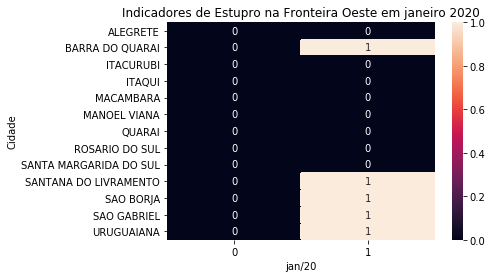

In [159]:
sns.heatmap(fronteiraOesteEstupro, annot=True)
plt.title("Indicadores de Estupro na Fronteira Oeste em janeiro 2020")


#### Quais cidades possuem maiores e menores índices de Feminicídio Consumado na fronteira oeste em janeiro de 2020?


In [160]:
#Alocando dados de Feminicídio tentado de 2020 das Cidades da fronteira oeste 
alegrete = consumado_2020[consumado_2020['Cidade']=='ALEGRETE']
itaqui = consumado_2020[consumado_2020['Cidade']=='ITAQUI']
barraQuarai = consumado_2020[consumado_2020['Cidade']=='BARRA DO QUARAI']
itacurubi = consumado_2020[consumado_2020['Cidade']=='ITACURUBI']
macambara = consumado_2020[consumado_2020['Cidade']=='MACAMBARA']
manoelViana = consumado_2020[consumado_2020['Cidade']=='MANOEL VIANA']
quarai = consumado_2020[consumado_2020['Cidade']=='QUARAI']
rosario = consumado_2020[consumado_2020['Cidade']=='ROSARIO DO SUL']
margarida = consumado_2020[consumado_2020['Cidade']=='SANTA MARGARIDA DO SUL']
livramento = consumado_2020[consumado_2020['Cidade']=='SANTANA DO LIVRAMENTO']
borja  = consumado_2020[consumado_2020['Cidade']=='SAO BORJA']
gabriel = consumado_2020[consumado_2020['Cidade']=='SAO GABRIEL']
uruguaiana = consumado_2020[consumado_2020['Cidade']=='URUGUAIANA']

In [161]:
#Alocando dados de Estupro de 2020 das cidades da fronteira oeste 
fronteiraOeste = pd.DataFrame
fronteiraOeste = alegrete
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itaqui))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(barraQuarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itacurubi))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(macambara))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(manoelViana))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(quarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(rosario))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(margarida))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(livramento))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(borja))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(gabriel))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(uruguaiana))
fronteiraOeste

,Cidade,jan/20,fev/20,mar/20,abr/20,mai/20,jun/20,jul/20,ago/20,set/20,out/20,nov/20,dez/20,Total
0,ALEGRETE,0,0,1,0,0,0,0,0,0,0,0.0,0.0,1
36,SANTANA DO LIVRAMENTO,0,0,0,0,0,1,0,0,0,0,0.0,0.0,1


In [162]:
#Colocando pivô no dataframe
fronteiraOesteConsumado = fronteiraOeste.pivot( "Cidade","jan/20","jan/20")
fronteiraOesteConsumado = fronteiraOesteConsumado.replace(np.nan,0)
fronteiraOesteConsumado

jan/20,0
Cidade,
ALEGRETE,0
SANTANA DO LIVRAMENTO,0


Text(0.5, 1, 'Indicadores de Feminicídio Consumado na Fronteira Oeste em janeiro 2020')

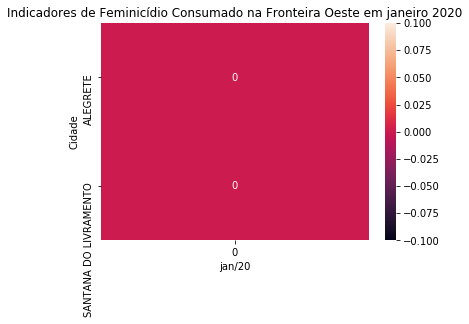

In [163]:
sns.heatmap(fronteiraOesteConsumado, annot=True)
plt.title("Indicadores de Feminicídio Consumado na Fronteira Oeste em janeiro 2020")


####  Quais cidades possuem maiores e menores índices de Feminicídio Tentado na fronteira oeste em janeiro de 2020?


In [164]:
#Alocando dados de Feminicídio tentado de 2020 das Cidades da fronteira oeste 
alegrete = tentado_2020[tentado_2020['Cidade']=='ALEGRETE']
itaqui = tentado_2020[tentado_2020['Cidade']=='ITAQUI']
barraQuarai = tentado_2020[tentado_2020['Cidade']=='BARRA DO QUARAI']
itacurubi = tentado_2020[tentado_2020['Cidade']=='ITACURUBI']
macambara = tentado_2020[tentado_2020['Cidade']=='MACAMBARA']
manoelViana = tentado_2020[tentado_2020['Cidade']=='MANOEL VIANA']
quarai = tentado_2020[tentado_2020['Cidade']=='QUARAI']
rosario = tentado_2020[tentado_2020['Cidade']=='ROSARIO DO SUL']
margarida = tentado_2020[tentado_2020['Cidade']=='SANTA MARGARIDA DO SUL']
livramento = tentado_2020[tentado_2020['Cidade']=='SANTANA DO LIVRAMENTO']
borja  = tentado_2020[tentado_2020['Cidade']=='SAO BORJA']
gabriel = tentado_2020[tentado_2020['Cidade']=='SAO GABRIEL']
uruguaiana = tentado_2020[tentado_2020['Cidade']=='URUGUAIANA']

In [165]:
#Alocando dados de Estupro de 2020 das cidades da fronteira oeste 
fronteiraOeste = pd.DataFrame
fronteiraOeste = alegrete
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itaqui))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(barraQuarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(itacurubi))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(macambara))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(manoelViana))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(quarai))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(rosario))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(margarida))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(livramento))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(borja))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(gabriel))
fronteiraOeste = fronteiraOeste.append(pd.DataFrame(uruguaiana))
fronteiraOeste

,Cidade,jan/20,fev/20,mar/20,abr/20,mai/20,jun/20,jul/20,ago/20,set/20,out/20,nov/20,dez/20,Total
1,ALEGRETE,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,1
60,QUARAI,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,0.0,2
68,SANTANA DO LIVRAMENTO,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0.0,0.0,2
75,SAO BORJA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,0.0,2
98,URUGUAIANA,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0,2,0.0,0.0,6


In [166]:
#Colocando pivô no dataframe
fronteiraOesteTentado = fronteiraOeste.pivot( "Cidade","jan/20","jan/20")
fronteiraOesteTentado = fronteiraOesteTentado.replace(np.nan,0)
fronteiraOesteTentado

jan/20,0.0,1.0
Cidade,,
ALEGRETE,0.0,0.0
QUARAI,0.0,1.0
SANTANA DO LIVRAMENTO,0.0,0.0
SAO BORJA,0.0,1.0
URUGUAIANA,0.0,0.0


Text(0.5, 1, 'Indicadores de Feminicídio Tentado na Fronteira Oeste em janeiro 2020')

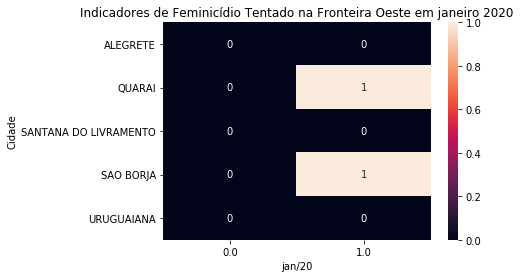

In [167]:
sns.heatmap(fronteiraOesteTentado, annot=True)
plt.title("Indicadores de Feminicídio Tentado na Fronteira Oeste em janeiro 2020")
